AVANCE 1

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Importa las librerías que necesitarás para realizar el 1° avance del PI

In [1]:
import pandas as pd

In [2]:
import numpy as np

2. Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code

In [51]:
# Leer el archivo CSV
data = pd.read_csv(r"C:\Users\bianc\Downloads\data_latinoamerica.csv", sep=',') 

In [52]:
# muestra las primeras filas de tu DataFrame
data.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


 3. Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas (12,216,057 filas y 50 columnas)

In [53]:
# dimensiones del DataFrame,  el número de filas y columnas que contiene.
np.shape(data) #numpy para la forma que tiene nuestro dataset

(12216057, 50)

In [54]:
# seleccionar únicamente las filas que pertenecen a un conjunto específico de países latinoamericanos
paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)] 
#La función isin() te permite verificar si cada elemento de una serie o DataFrame se encuentra dentro de una lista de valores específicos. 

In [55]:
data.shape #panda para la forma que tiene nuestro DataFrame

(12216057, 50)

Compara a nivel de país para llenar valores faltantes:

In [56]:
#Este código busca en el DataFrame data_latinoamerica las columnas que tienen más de 4000000 valores nulos (NaN). Luego, te muestra el nombre de esas columnas y la cantidad exacta de valores nulos en cada una. 
# ISNULL Crea un nuevo DataFrame del mismo tamaño, pero con valores booleanos (True o False) en lugar de los datos originales.
#Un valor será True si el valor correspondiente en el DataFrame original es nulo (NaN), y False si no lo es.
#SUM suma los valores True en cada columna. Como True se considera como 1 y False como 0, el resultado de la suma te indica cuántos valores nulos hay en esa columna.
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


4. Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil

In [57]:
#Este código crea un nuevo DataFrame llamado data_latinoamerica_paises que contiene solo las filas del DataFrame original data_latinoamerica correspondientes a los países Argentina, Chile, Colombia, México, Perú y Brasil. En otras palabras, filtra los datos para incluir solo los países de interés.
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]
#La función isin() verifica si los valores de la columna 'location_key' están presentes en la lista que le proporcionamos: ['AR', 'CL', 'CO', 'MX', 'PE', 'BR'].

Haciendo el análisis de calidad de datos, puedo deducir que el primer filtrado esta bien hecho para los paises mencionados pero en location key se repite valores. Esto es la razón 
de tantos datos faltantes en muchas columnas, por lo que hacemos un nuevo filtro por la columna location_key pero sólo con instancias que correspondan a los paises seleccionados y 
no a sus regiones o subregiones: AR, CL, CO, MX, PE, BR.

In [58]:


data_latinoamerica_paises.shape

(5946, 50)

6. Filtra los datos en fechas mayores a 2021-01-01:

In [59]:
#Filtra los datos en fechas mayores a 2021-01-01.
data_latinoamerica_paises_Fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

In [60]:
#vuelvo a consultar las dimensiones del dataframe 
data_latinoamerica_paises_Fecha.shape


(3744, 50)

In [61]:
#Completar los valores nulos de las columnas con la media de cada país:
#se enfoca en reemplazar estos valores vacíos con la media de los valores existentes para cada país en cada columna.
#La media aritmética, que es la más común, se calcula sumando todos los valores y dividiendo el resultado entre el número de valores.
for pais in paises_seleccionados:
    
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_deceased'] = data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_confirmed'] = data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_deceased'] = data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_deceased'].mean())
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['average_temperature_celsius'] = data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['maximum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['rainfall_mm'] = data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['relative_humidity'] = data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['relative_humidity'].mean())

       

#Llenar los vacios con 0 en la columna de new_recovered, cumulative_recovered, cumulative_vaccione_doses_administered para hacer analisis de estos datos:
#Al llenar los valores faltantes con 0, se mantiene la misma cantidad de registros y la misma estructura del DataFrame, 
# lo que permite realizar análisis posteriores sin problemas.
    data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
    data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
    data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)
    

   

10_Guardamos el dataset filtrado por fecha en un archivo csv para poderlo utilizar en el analisis y que no sea necesario cargar el archivo original.

In [62]:
! cd

c:\Users\bianc\OneDrive\Escritorio\MODULO 4 - PYTHON. SOY HENRY\.bianca


In [63]:
#verifica si existe un directorio llamado "export" en el directorio actual. Si no existe, lo crea.

import os

if not os.path.exists('export'):
    os.makedirs('export')

In [64]:
#exportar un DataFrame de pandas a un archivo CSV.

data_latinoamerica_paises_Fecha.to_csv("export/DatosFinalesFiltrado.csv",index=False)

Reiniciamos el notebook para liberar memoria y cargar el archivo filtrado para continuar con el analisis.

In [65]:
 #cargar un archivo CSV en un DataFrame de pandas.

data_latinoamerica_paises = pd.read_csv("export/DatosFinalesFiltrado.csv",sep=',')

In [66]:
# solicitar a Python que te brinde información detallada sobre el DataFrame data_latinoamerica_paises

data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3723 non-null   float64
 5   new_deceased                           3723 non-null   float64
 6   cumulative_confirmed                   3723 non-null   float64
 7   cumulative_deceased                    3723 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [67]:
#Mostrar los nombres de las columnas que conforman el DataFrame.

data_latinoamerica_paises.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [68]:
# Imprimo las estadísticas principales columna por columna usando un for cycle:
#for i in data_latinoamerica_paises.columns:: Este bucle for recorre cada una de las columnas del DataFrame. 
# En cada iteración, la variable i toma el nombre de una columna diferente.
for i in data_latinoamerica_paises.columns:
  print(i)
  print(data_latinoamerica_paises[i].describe())
  print('----------------------------------')
  # En lugar de calcular las estadísticas para cada columna manualmente, el bucle for automatiza este proceso,
  # haciendo que sea más eficiente y menos propenso a errores.
  # i: En cada iteración, la variable i tomará el valor del nombre de una columna diferente.
  # Método describe(): Este método calcula y muestra varias estadísticas descriptivas de la columna seleccionada

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
----------------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
----------------------------------
new_confirmed
count      3723.000000
mean      13936.279613
std       24273.618006
min        -573.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
----------------------------------
new_deceased
count     3723.000000
mean       277.164115
std        508.449365
min          0.000000
25%         25.500000
50%         

In [69]:
# Imprimo las estadísticas principales usando describe:
data_latinoamerica_paises.describe(include="all")

# Este codigo proporciona un resumen estadístico de todo el DataFrame data_latinoamerica_paises. 
# A diferencia del código anterior que analizaba columna por columna, este comando ofrece una visión general más rápida de todas 
# las variables presentes en el conjunto de datos.

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
count,3744,3744,3744,3744,3723.000000,3723.000000,3.723000e+03,3723.000000,3.744000e+03,3.744000e+03,...,3.744000e+03,3.744000e+03,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3.744000e+03
unique,6,624,6,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AR,2022-09-17,AR,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,624,6,624,624,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,13936.279613,277.164115,6.784382e+06,193136.784045,6.544474e+07,7.772147e+07,...,1.443888e+07,2.636580e+06,59502.500000,76.808500,154.274667,81.428000,36.566667,14.816667,8263.612179,3.894398e+06
std,NaN,NaN,NaN,NaN,24273.618006,508.449365,7.999625e+06,183022.316718,9.247680e+07,6.713776e+07,...,5.710077e+06,2.584740e+06,45125.320206,1.597394,27.000146,11.800623,13.027569,1.665972,23049.011844,8.418383e+06
min,NaN,NaN,NaN,NaN,-573.000000,0.000000,9.710000e+02,1.000000,0.000000e+00,1.757400e+07,...,6.723516e+06,7.094180e+05,12027.000000,74.992000,107.669000,59.035000,25.300000,12.400000,-31119.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,1530.500000,25.500000,2.129800e+06,59225.000000,2.618297e+06,2.938188e+07,...,1.055471e+07,1.090598e+06,16425.000000,75.672000,146.370000,77.999000,26.600000,12.600000,0.000000,0.000000e+00
50%,NaN,NaN,NaN,NaN,5176.000000,99.000000,3.633546e+06,139636.000000,3.244576e+07,4.791080e+07,...,1.291832e+07,1.543881e+06,45582.000000,76.518000,149.351000,82.149000,33.300000,15.750000,0.000000,0.000000e+00
75%,NaN,NaN,NaN,NaN,14915.000000,313.500000,6.223497e+06,215123.500000,7.478108e+07,1.109920e+08,...,2.167191e+07,2.690269e+06,102418.000000,77.109000,184.379000,91.421000,37.000000,15.800000,1830.500000,2.136215e+06


AVANCE 2

In [4]:
#Importo las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [71]:
import warnings 
warnings.filterwarnings("ignore") #con este codigo ignoro las advertencias

In [72]:
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [73]:
import os
print(os.getcwd())
#Este código te muestra en qué carpeta estás trabajando actualmente en tu computadora. 
#Es una herramienta útil para asegurarte de que estás ejecutando tu código en el directorio correcto, especialmente cuando trabajas con múltiples archivos y carpetas.

c:\Users\bianc\OneDrive\Escritorio\MODULO 4 - PYTHON. SOY HENRY\.bianca


Acercamiento a las estadísticas básicas de los datos. Usamos un ciclo for para recorrer las columnas y obtener la media,mediana,desviación estandar,mínimo y máximo de cada columna. 

In [74]:
for i in data_latinoamerica_paises.columns:
 print(i)
 print(data_latinoamerica_paises[i].describe())
 print('---------------------')
 
 #Este código iterará sobre cada columna de un DataFrame llamado data_latinoamerica_paises y mostrará un resumen estadístico de cada una de ellas. 
 #Esto es muy útil para obtener una rápida visión general de los datos y detectar posibles problemas o patrones.
 
 #for: inicia un bucle que se repetirá varias veces.
 # i: Es una variable que tomará el valor de cada elemento en la secuencia sobre la que se está iterando. 
 # En este caso, representará el nombre de cada columna en el DataFrame.
 # .describe()  calcula y muestra varias estadísticas descriptivas, como: count: Número de valores no nulos y mean: Media (promedio). 

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
---------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: new_d

In [75]:
#SELECCIONO LOS PAISES:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

In [76]:
#Ponemos como indice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo

data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)



Vamos a  proceder a realizar una rápida revisión gráfica de la gran mayoría de las columnas para ver como se comportan los datos

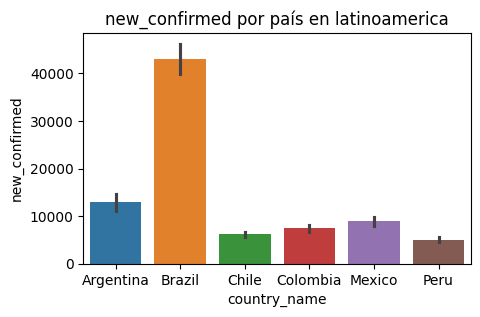

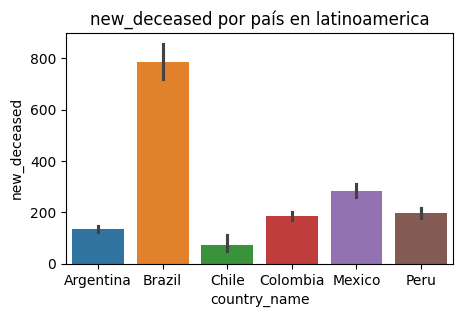

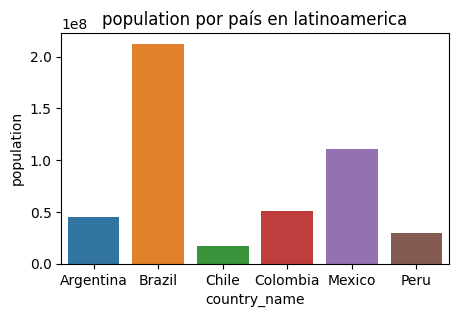

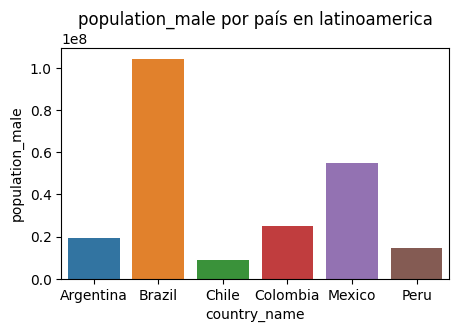

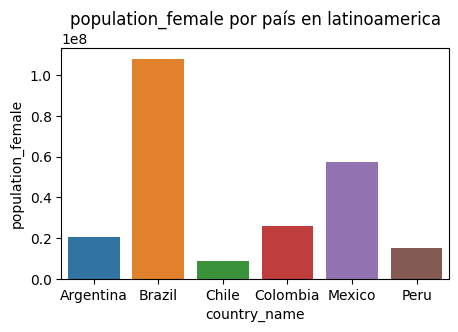

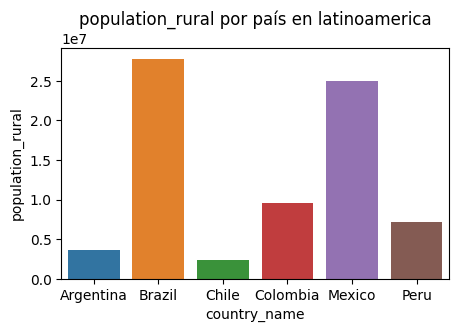

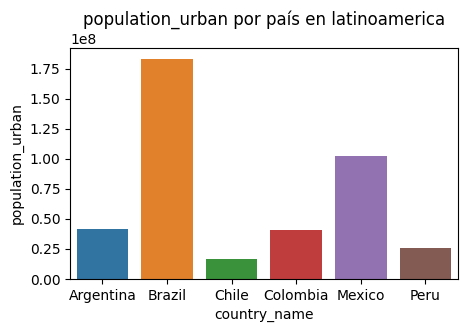

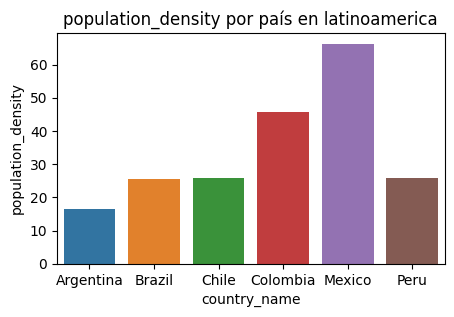

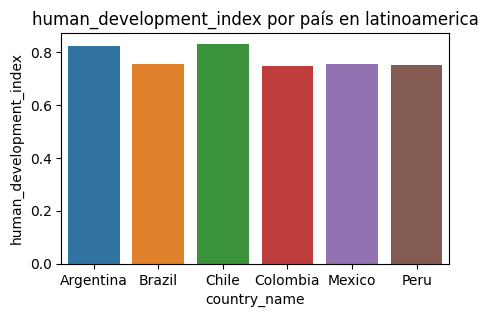

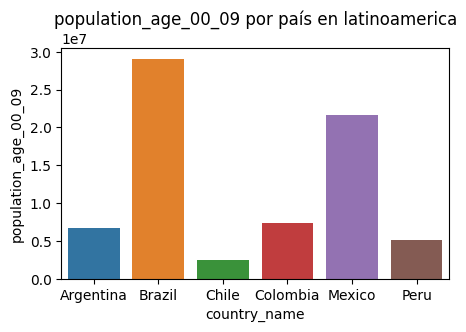

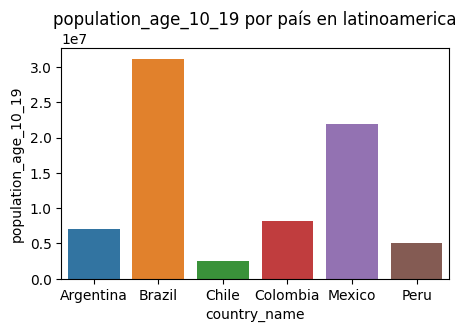

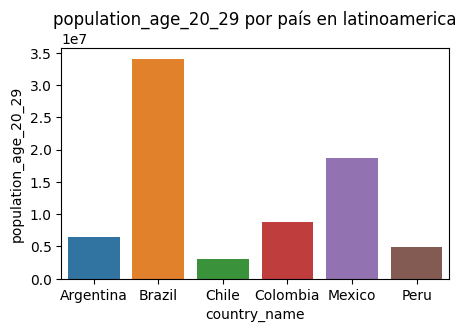

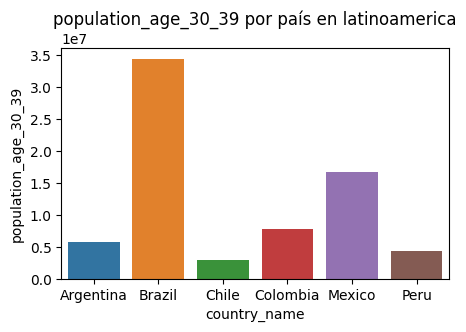

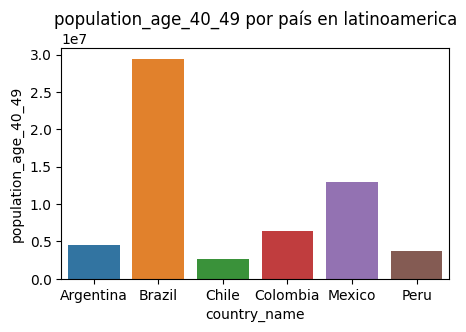

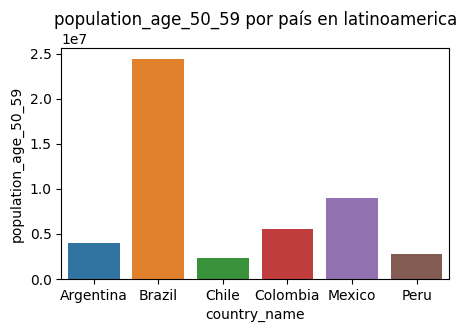

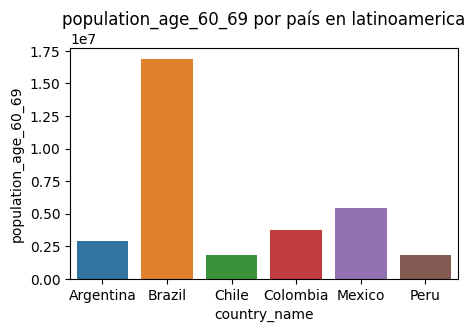

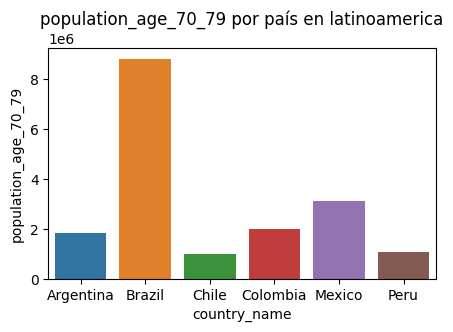

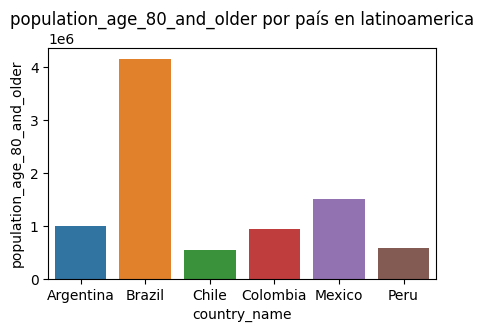

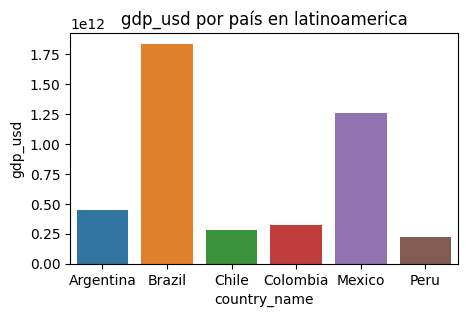

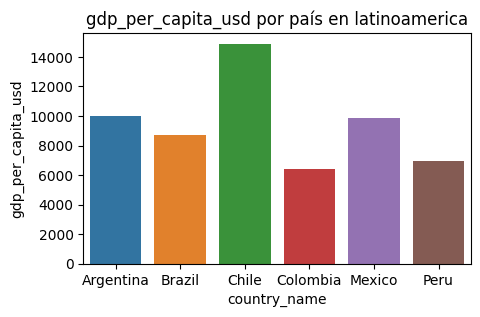

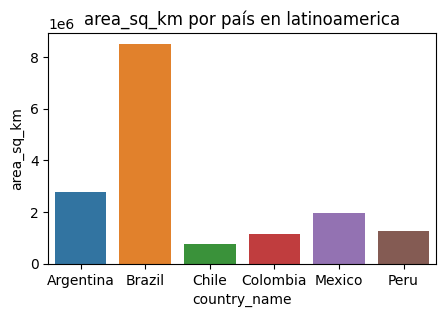

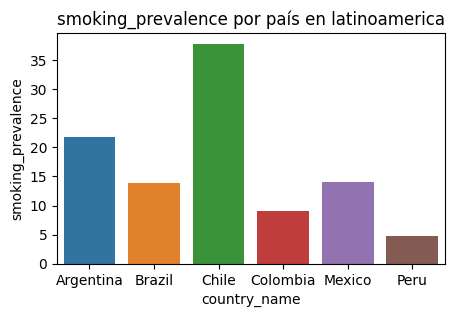

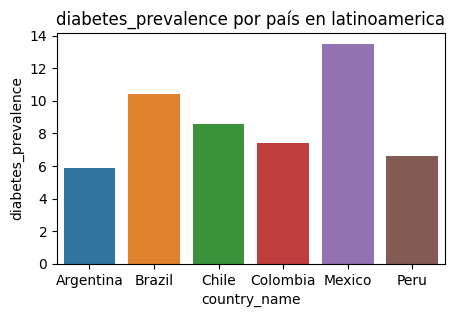

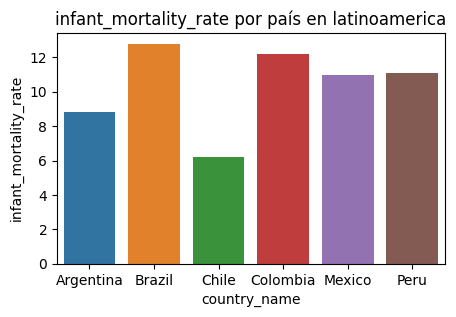

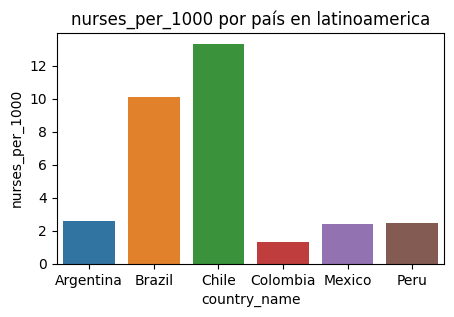

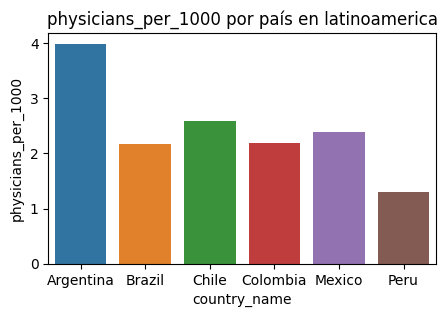

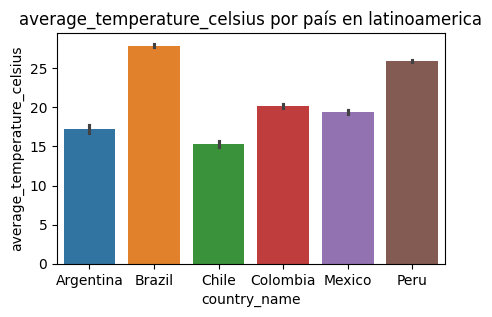

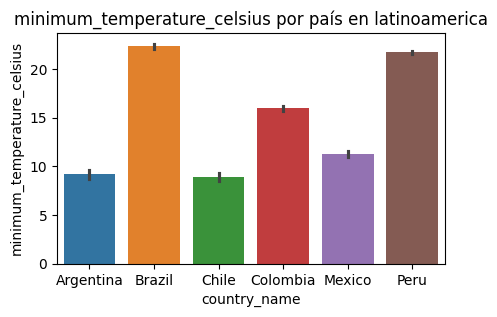

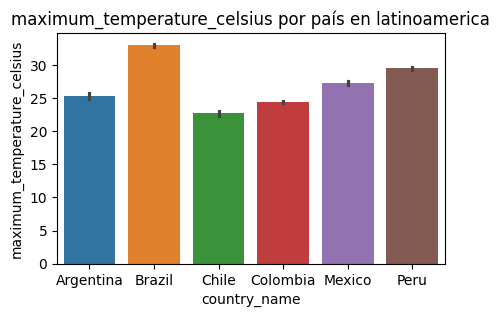

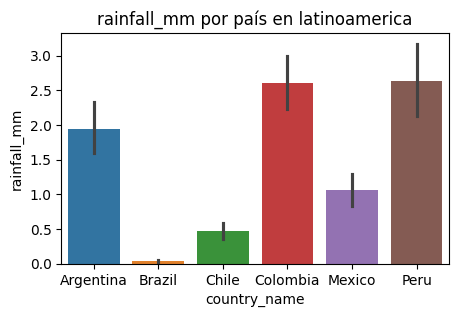

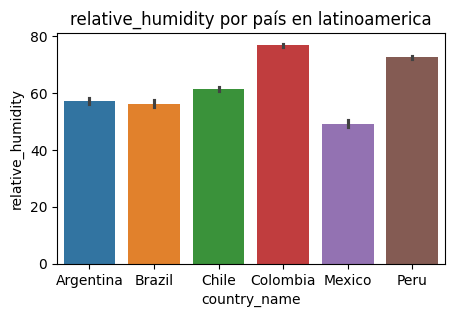

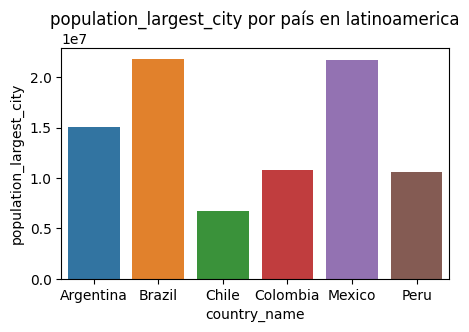

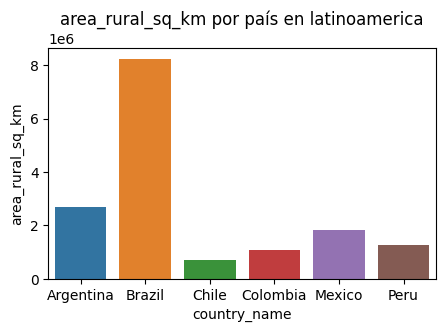

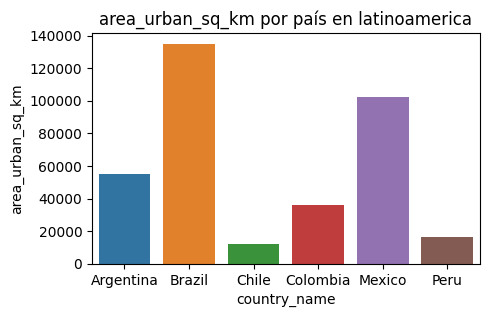

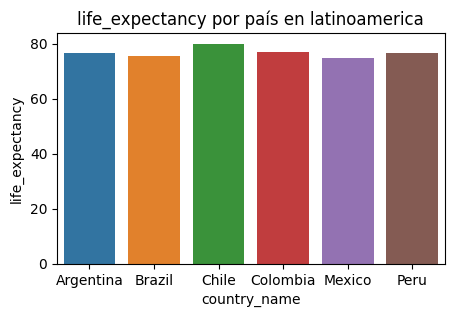

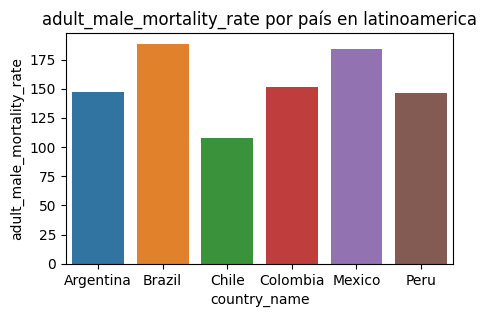

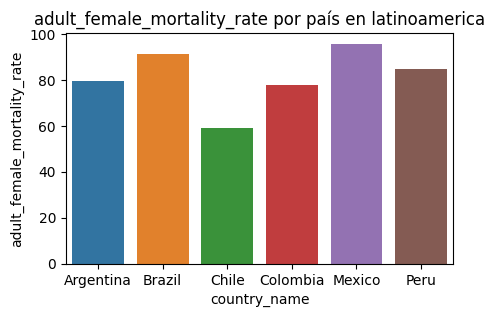

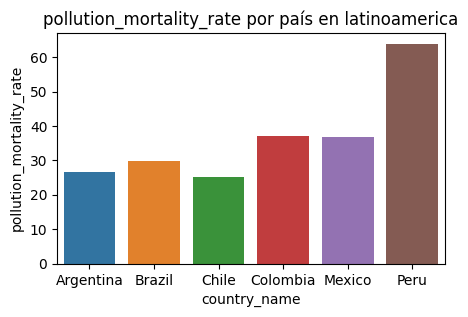

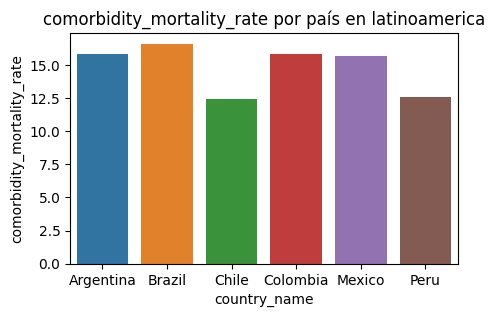

In [77]:

for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']: #con esto indico que no me traiga estas columnas
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax,hue='country_name') 
        plt.title(f'{i} por país en latinoamerica')
        plt.show() 
        ## hue: Este argumento se utiliza para agregar una dimensión adicional al gráfico. 
        # En este caso, cada barra se coloreará según el país al que corresponde.

Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.

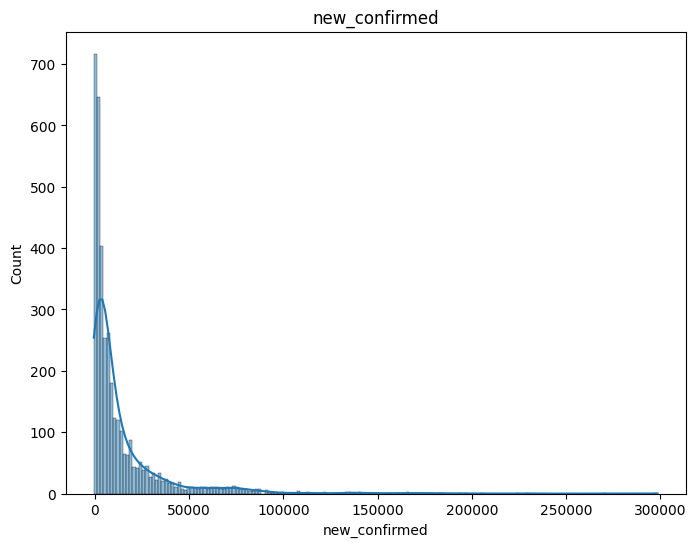

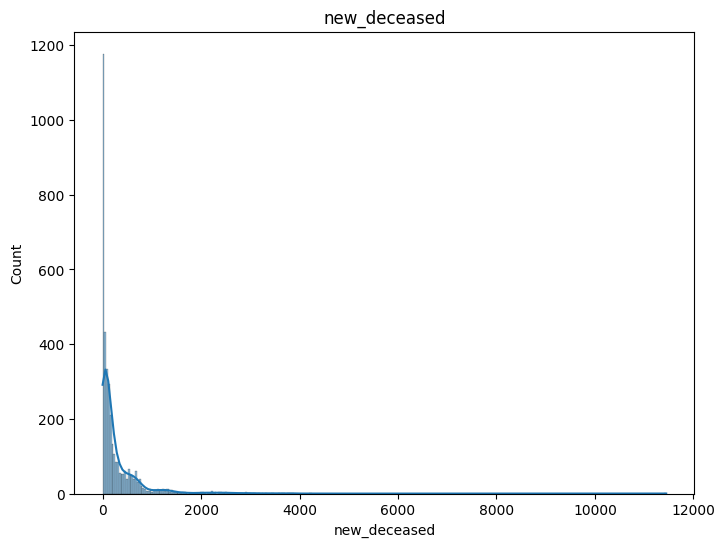

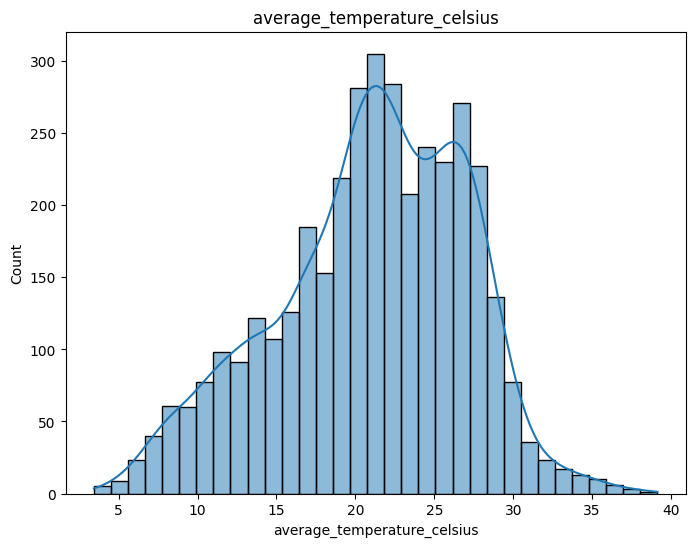

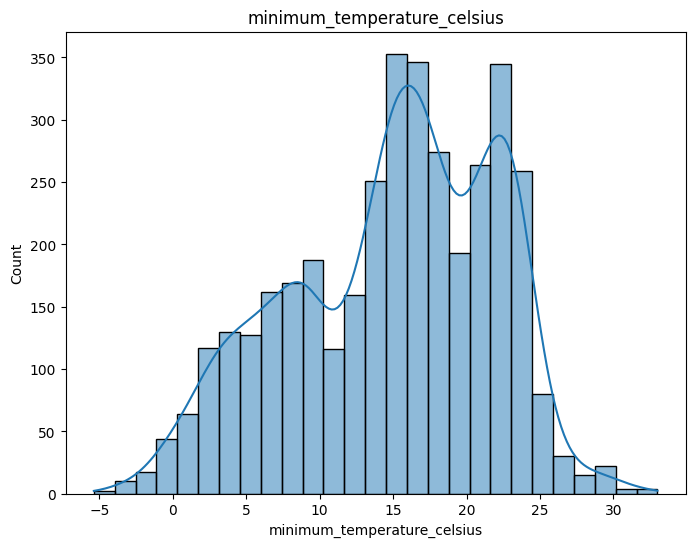

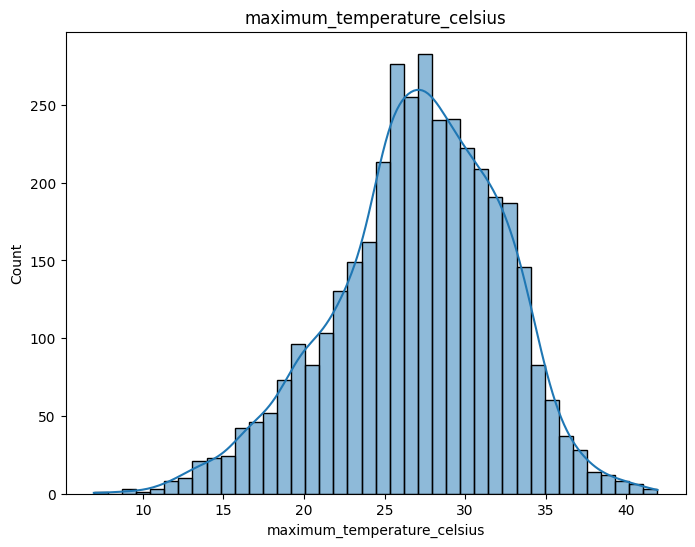

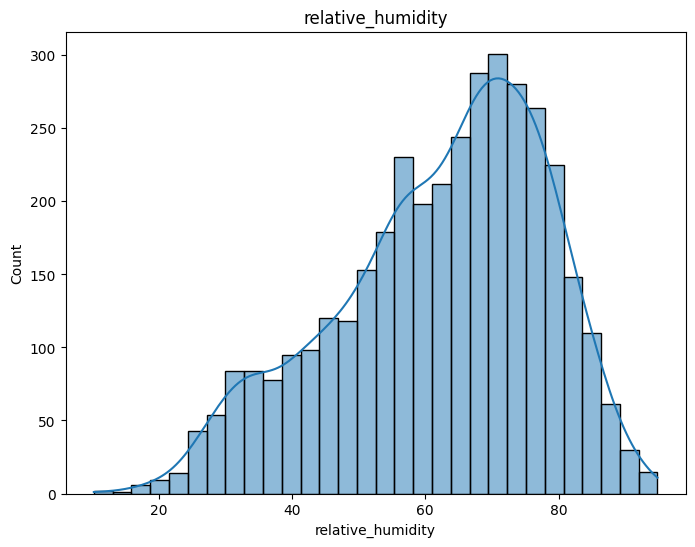

In [39]:
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius", "relative_humidity"]
#Crear histogramas de las variables númericas
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ['location_key','date','country_code','country_name','longitude','cumulative_confirmed', 'cumulative_deceased',
        'cumulative_recovered', 'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data_latinoamerica_paises[i], kde=True) 
        plt.title(i)
        plt.show()
        
        ##kde=True: Este argumento agrega un gráfico de estimación de densidad de kernel (KDE) sobre el histograma. 
        # KDE es una forma no paramétrica de estimar la función de densidad de probabilidad de una variable aleatoria

Procederemos a realizar un analisis enfocados en algunas variables especificas, en este caso vamos a analizar la variable average_temperature y la variable new_confirmed, con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura. 

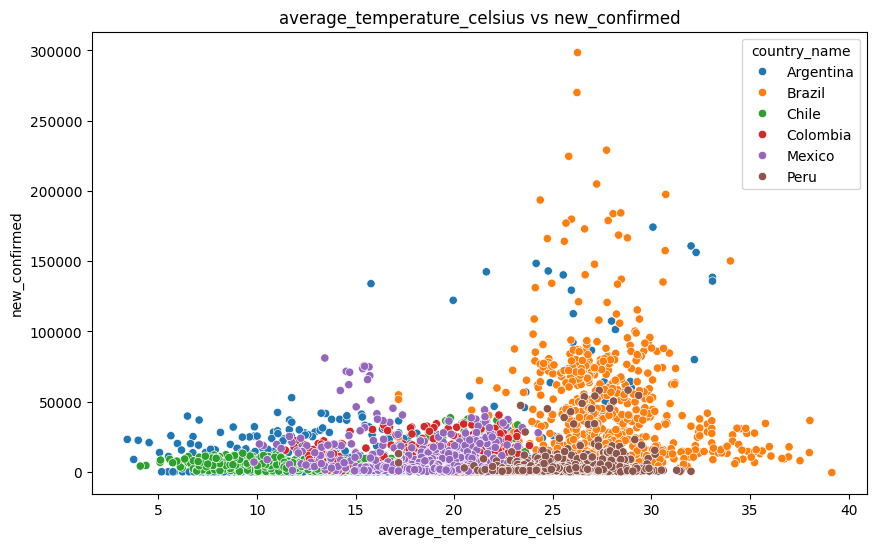

In [78]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

Se ha podido observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.

Como vimos que la temperatura tiene alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio con la cantidad de muertes.

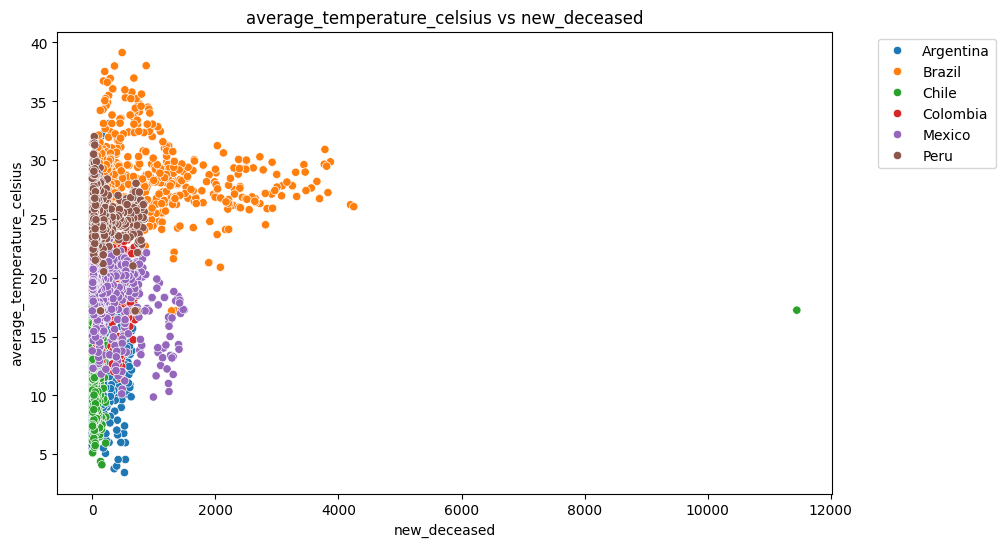

In [79]:
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico, ligeramente a la derecha del borde, alineada con la parte superior. Esto es útil si deseas colocar la leyenda fuera del área del gráfico para no tapar los datos.
plt.show()

En la grafica anterior se ve un comportamiento similar al de los casos confirmados, en algunos paises la temperatura no influye en la cantidad de muertes, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de muertes.

Ahora si veamos como se comportan las variables en un estudio longitudinal, es decir a lo largo del tiempo.

Por lo tanto, se hace una primera aproximación y observaremos las dosis administradas por mes en todos los países.

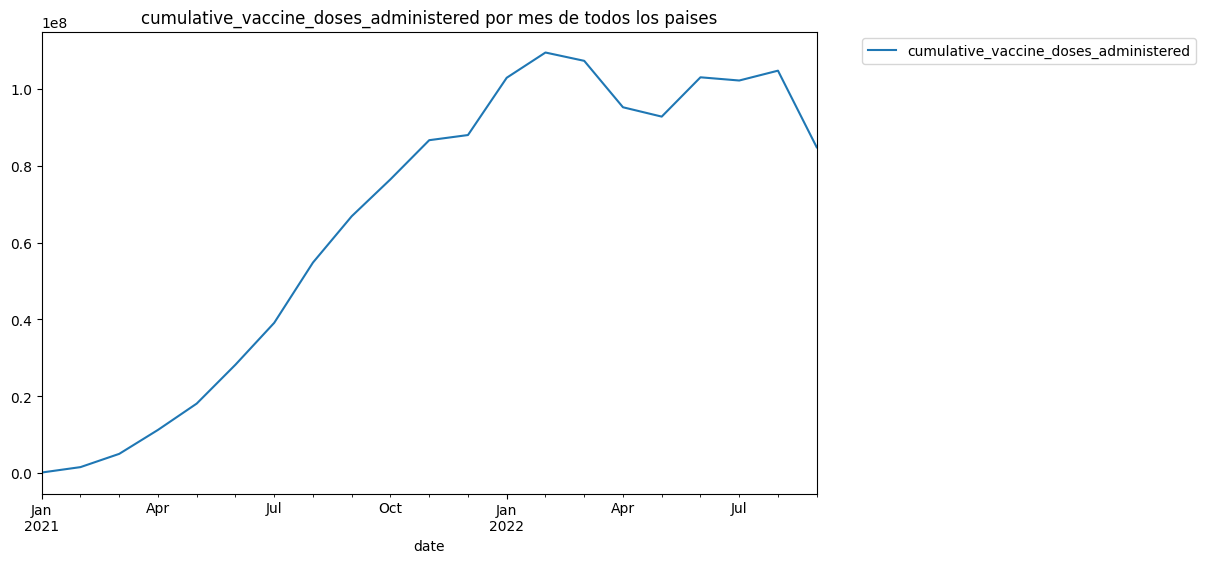

In [80]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot() # este método genera una gráfica de línea que representa cómo ha cambiado el promedio de las dosis acumuladas administradas a lo largo del tiempo, con la frecuencia mensual.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

#.resample('ME'): El método resample() en Pandas se usa para cambiar la frecuencia de los datos.
# Aquí, 'ME' significa que se están agrupando los datos mensualmente al final del mes. 
# Es decir, se va a reorganizar la información por intervalos mensuales.
#.mean(numeric_only=True): Luego de agrupar los datos por mes, se calcula la media de las columnas numéricas 
# (en este caso, de las dosis de vacunas administradas) para cada mes. 
# # El parámetro numeric_only=True asegura que solo se calculen las medias para las columnas con valores numéricos, 
# evitando errores si hay columnas con datos no numéricos.

En la anterior gráfica se puede observar que la cantidad de dosis administradas en los países de Argentina, Brasil, Chile, Colombia, México y Perú ha ido aumentando a lo largo del tiempo, recordemos que es un análisis general y no se ha hecho un análisis detallado.

 vamos a realizar un análisis más detallado de las dosis administradas por mes en cada país.

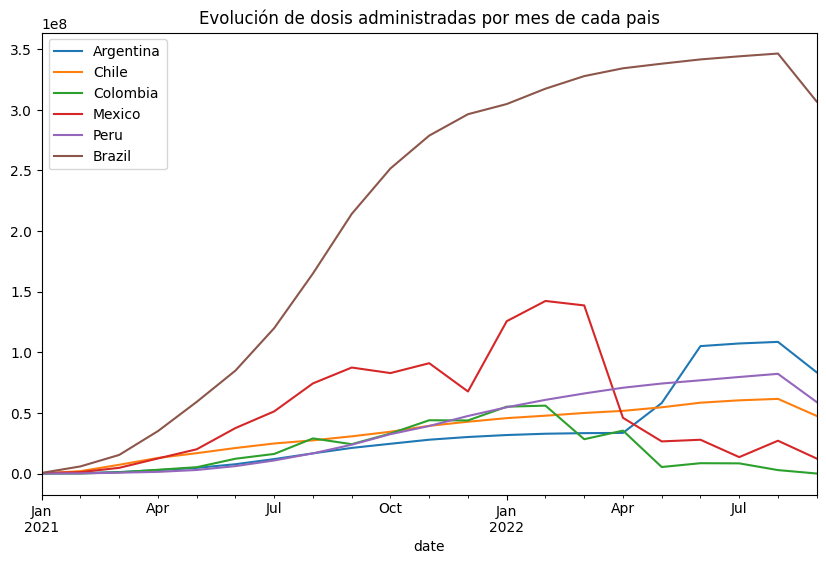

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:#Inicia un bucle: Comienza un bucle for que iterará sobre cada país en la lista paises_seleccionados. Esto significa que se creará un gráfico para cada país seleccionado.
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot() #Agrupa por mes: resample('ME') agrupa los datos por mes (ME significa "Mes"). Esto es útil para analizar la evolución de las dosis administradas a lo largo del tiempo.Calcula el promedio: mean(numeric_only=True) calcula el promedio de la columna 'cumulative_vaccine_doses_administered' para cada mes. 
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()



#Este código crea una serie de gráficos de línea, uno para cada país seleccionado en la lista paises_seleccionados.
#Cada gráfico muestra la evolución del promedio de dosis de vacunas administradas por mes para ese país.



Si realizamos un análisis más detallado de las dosis administradas por mes en cada país, podemos observar que en algunos paises la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo en otros paises la cantidad de dosis administradas ha ido disminuyendo, Esto puede ser debido a muchos factores, como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.

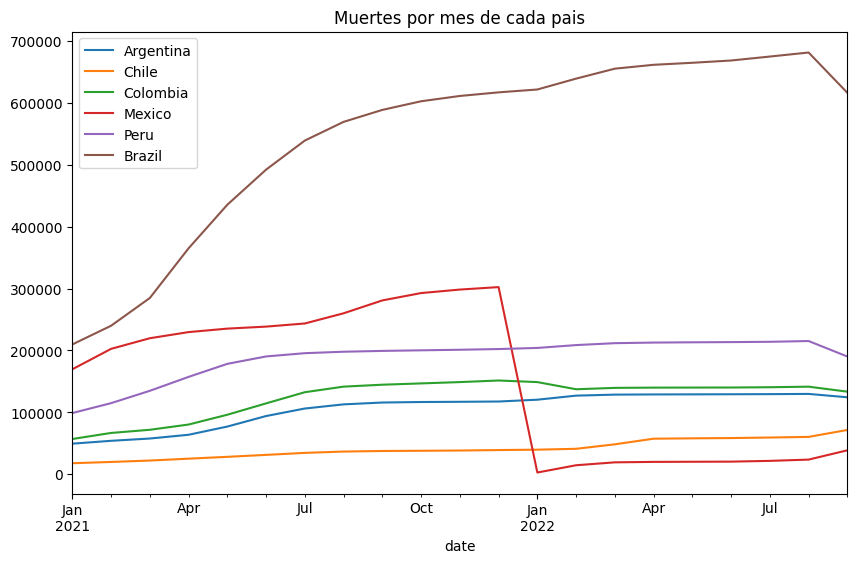

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

#Esta cadena de métodos realiza varias operaciones sobre los datos filtrados:
#.resample('ME'): Remuestrea los datos por mes ( 'ME') promediando los valores dentro de cada mes.
#.mean(numeric_only=True): Calcula la media de los valores, considerando solo columnas numéricas ( numeric_only=True) para evitar errores con datos no numéricos.
#['cumulative_deceased']: Selecciona la columna 'cumulative_deceased' después del remuestreo y el promedio.

#El código  crea un gráfico de series temporales que muestra las muertes mensuales promedio (acumulativas) para cada país de la  LISTA data_latinoamerica_paises

El país que mas muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

La disminución de casos en méxico puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio posterior.

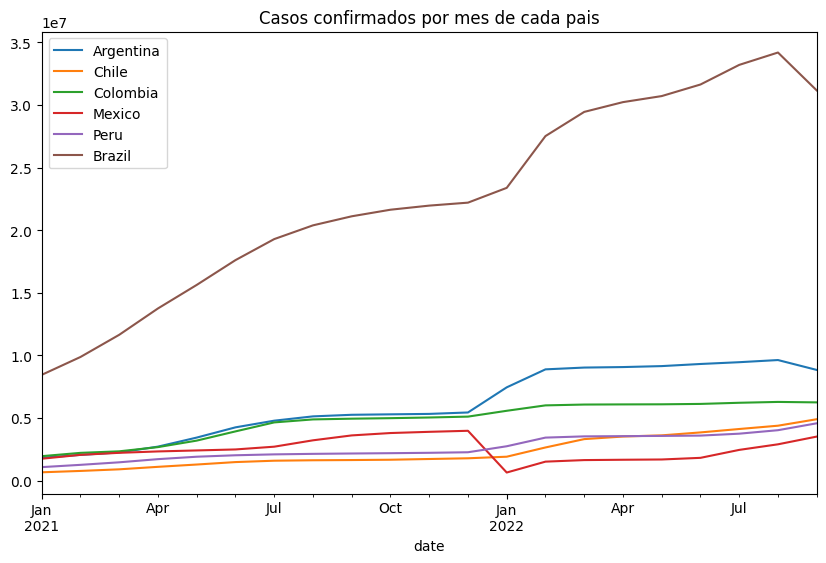

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

#Agrupa por mes: resample('ME') agrupa los datos por mes. Esto nos permite ver cómo cambian los números a lo largo del tiempo, mes a mes.
#Calcula el promedio: mean(numeric_only=True) calcula el promedio de casos confirmados por mes.
#Crea la línea: plot() crea una línea en el gráfico que muestra cómo cambian los casos confirmados promedio a lo largo del tiempo para ese país.

El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

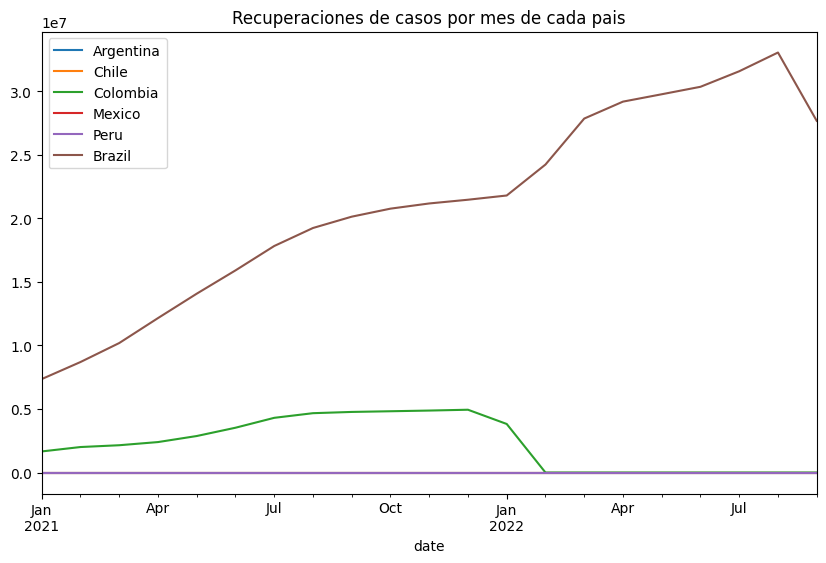

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

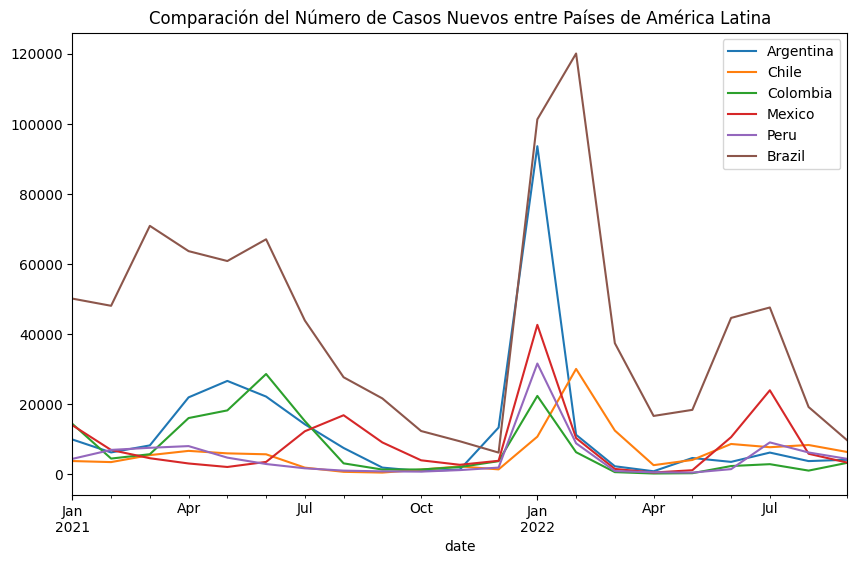

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

De los paises que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, se puede observar que la cantidad de muertes y casos confirmados es menor en estos paises ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

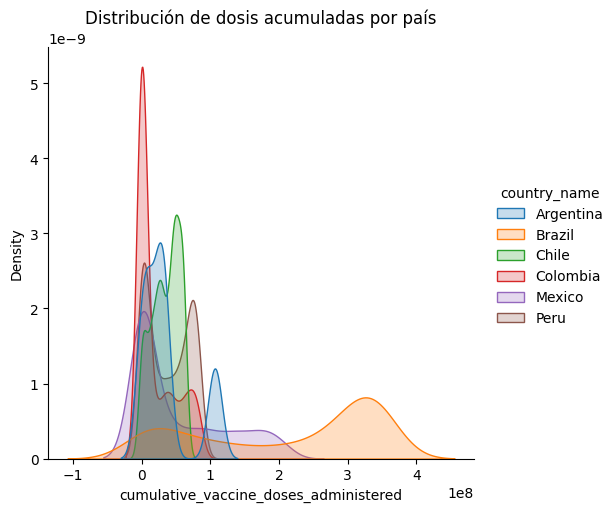

In [48]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

#hue="country_name": Este parámetro indica que el gráfico debe diferenciar los países (country_name) usando diferentes colores.
# Esto permite comparar las distribuciones de diferentes países en el mismo gráfico.

#kind="kde": Este parámetro define el tipo de gráfico. "kde" significa "Kernel Density Estimate", 
# que es un tipo de gráfico de líneas suavizadas que muestra la estimación de la densidad de probabilidad de una variable (en este caso, el número acumulado de dosis de vacunas).
# Es útil para ver la distribución de los datos de manera continua.

#fill=True: Este parámetro rellena el área bajo las curvas de densidad (kde) con color. 
# ada país tendrá una curva con un color diferente, y el área bajo la curva estará llena.

De los paises que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos paises ademas de ser desproporcionada la cantidad de vacunas administradas.

Aunque chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muertes, se puede observar que chile ha manejado mejor la pandemia que los demás paises.

Esto poco a poco nos ha llevado a concluir que los paises donde se podría crear los nuevos centros serían donde hay mas casos confirmados y muertes, ya que es donde se necesita más ayuda.

Pese a nuestro anterior análisis, no podemos tomar una decisión definitiva, ya que no hemos hecho un análisis detallado de los datos, por lo que se recomienda hacer un análisis más detallado y un estudio de los datos para poder tomar una decisión más acertada.


Procedamos a analizar la distribución de la población por grupos de edad en los paises seleccionados, para tratar de entender como se comporta la población en cada país y en un futuro poder tomar decisiones más acertadas.

In [81]:
pd.set_option('display.float_format', '{:.2f}'.format) 
#se emplea para cambiar el formato en que se muestran los números de tipo flotante cuando imprimes un DataFrame o Series.

Este código selecciona la población de diferentes grupos de edad :

In [82]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'] #cut_columns: Define una lista de columnas que incluyen el nombre del país y varias columnas con datos de la población por rangos de edad.
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09') #Filtra el DataFrame data_latinoamerica_paises para seleccionar únicamente las columnas definidas en cut_columns.
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution #Selecciona las columnas de población por rangos de edad en last_cases (que previamente se agrupó y ordenó).

population_age_00_09          72354498.00
population_age_10_19          75821668.00
population_age_20_29          75953404.00
population_age_30_39          72153175.00
population_age_40_49          59596656.00
population_age_50_59          47961620.00
population_age_60_69          32654396.00
population_age_70_79          17789478.00
population_age_80_and_older    8711719.00
dtype: float64

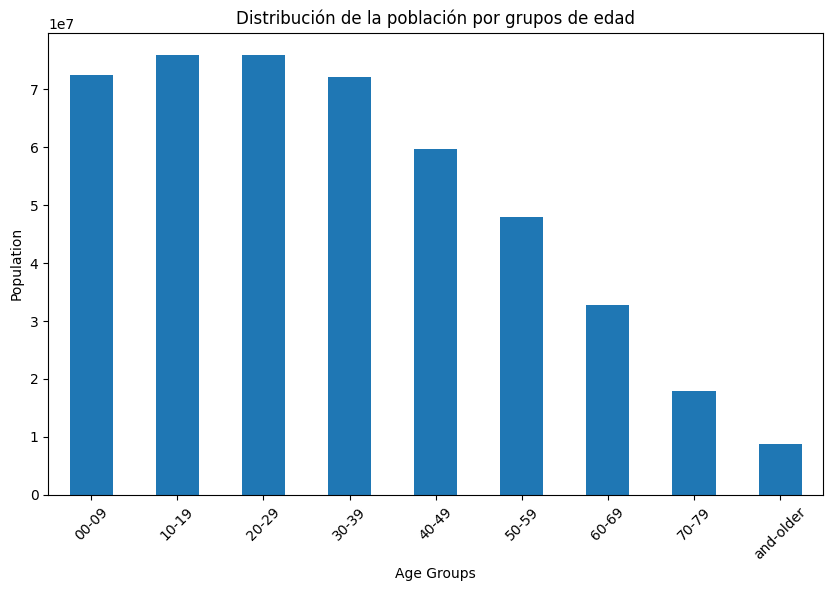

In [53]:
# Calculamos la distribucion de la poblacion por grupos de edad

cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

#plt.xticks(): Este es un método de Matplotlib que se utiliza para definir las posiciones y las etiquetas del eje X en un gráfico. 
# Permite especificar tanto los lugares donde aparecen las marcas (ticks) como las etiquetas asociadas a esas marcas.

#range(len(age_columns)): Esto genera una secuencia de números enteros, desde 0 hasta el número de elementos en age_columns. 
# Esto significa que se están estableciendo las marcas del eje X en cada uno de esos puntos (correspondientes a las posiciones de las columnas de edad).

#[col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns]:

# col.split('_'): Esta expresión toma cada nombre de columna de age_columns (que están en el formato population_age_00_09, etc.) .
# Por ejemplo, 'population_age_00_09' se convierte en ['population', 'age', '00', '09'].

Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etario.

In [54]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

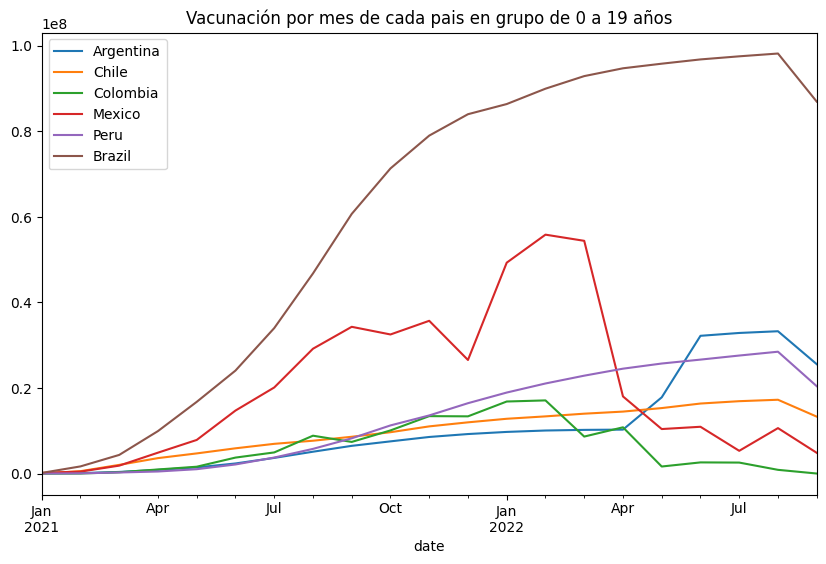

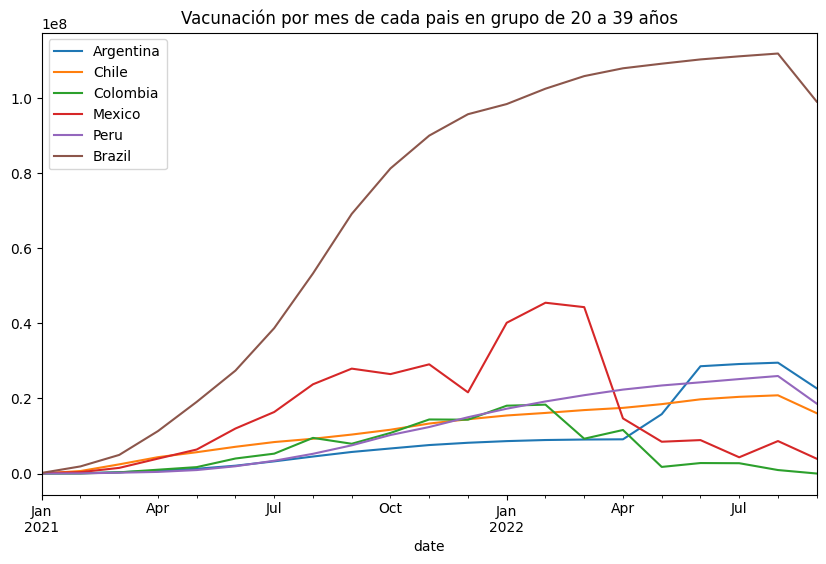

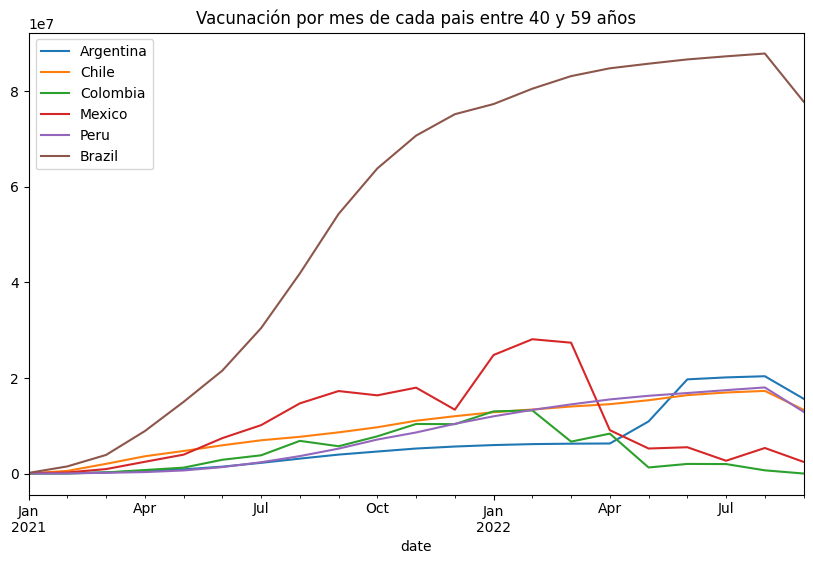

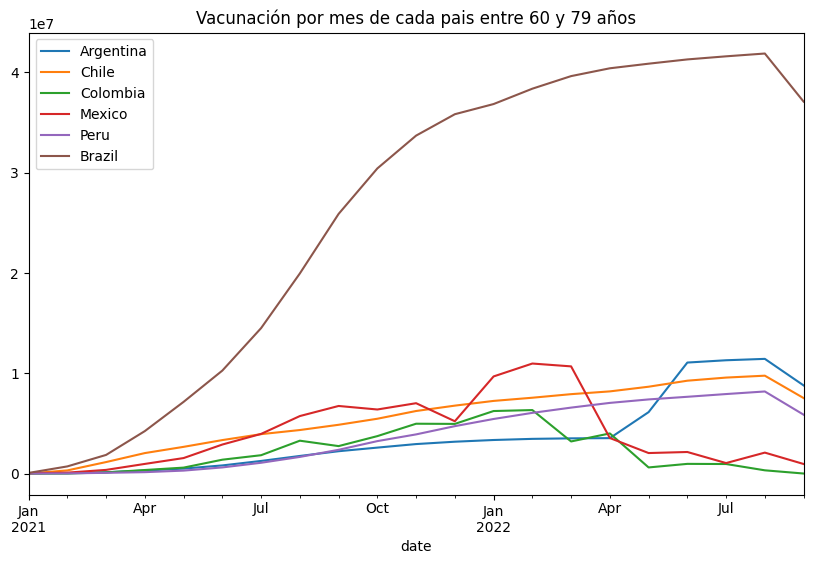

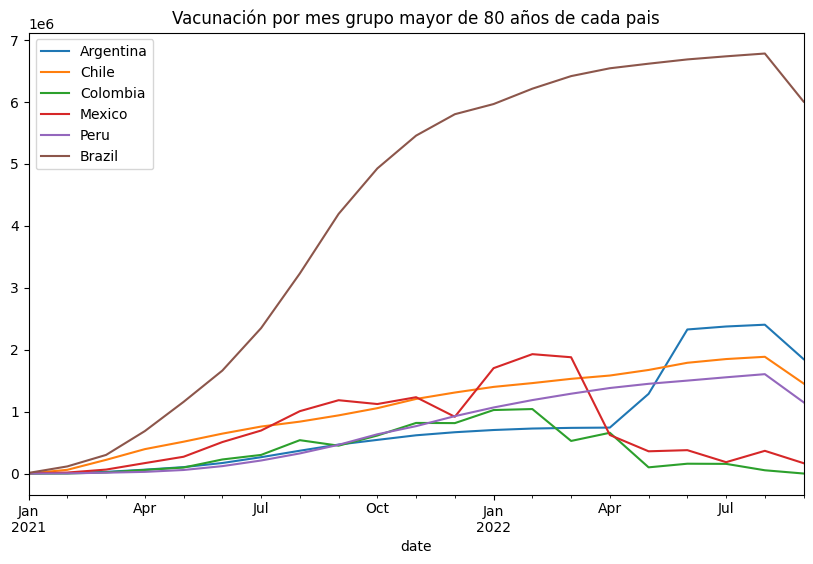

In [55]:
# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

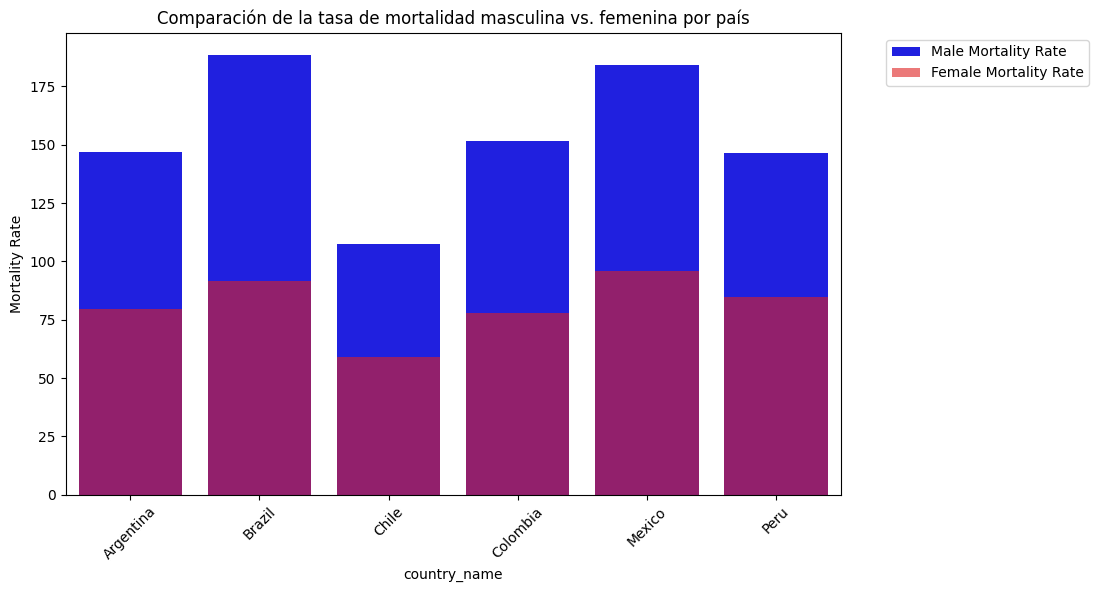

In [56]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.



Ahora veamos que tanto afecta la Diabetes y Fumar, con el COVID-19

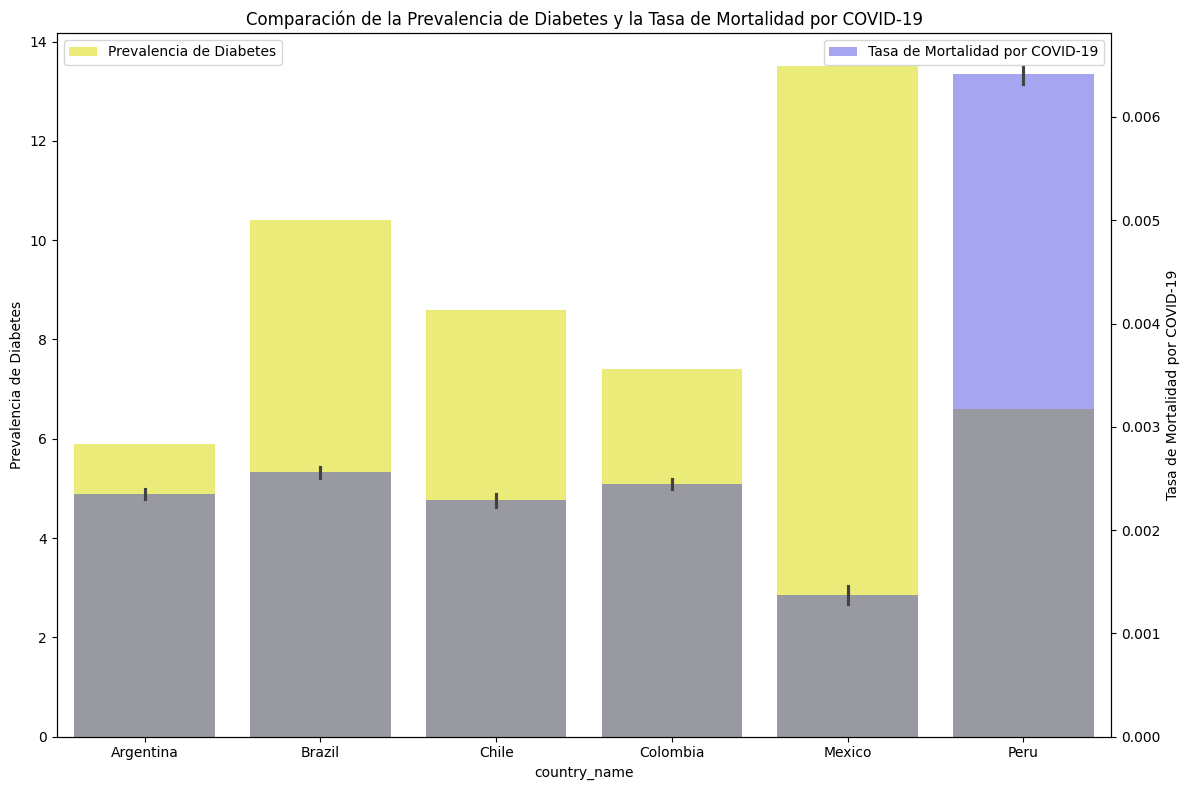

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

El gráfico sugiere que hay una variación significativa en la prevalencia de diabetes y la tasa de mortalidad por COVID-19 en diferentes países de América Latina. En algunos casos, como México, parece haber una relación entre una mayor prevalencia de diabetes y una mayor tasa de mortalidad por COVID-19, pero esto no es un patrón uniforme en todos los países.

FUMAR:

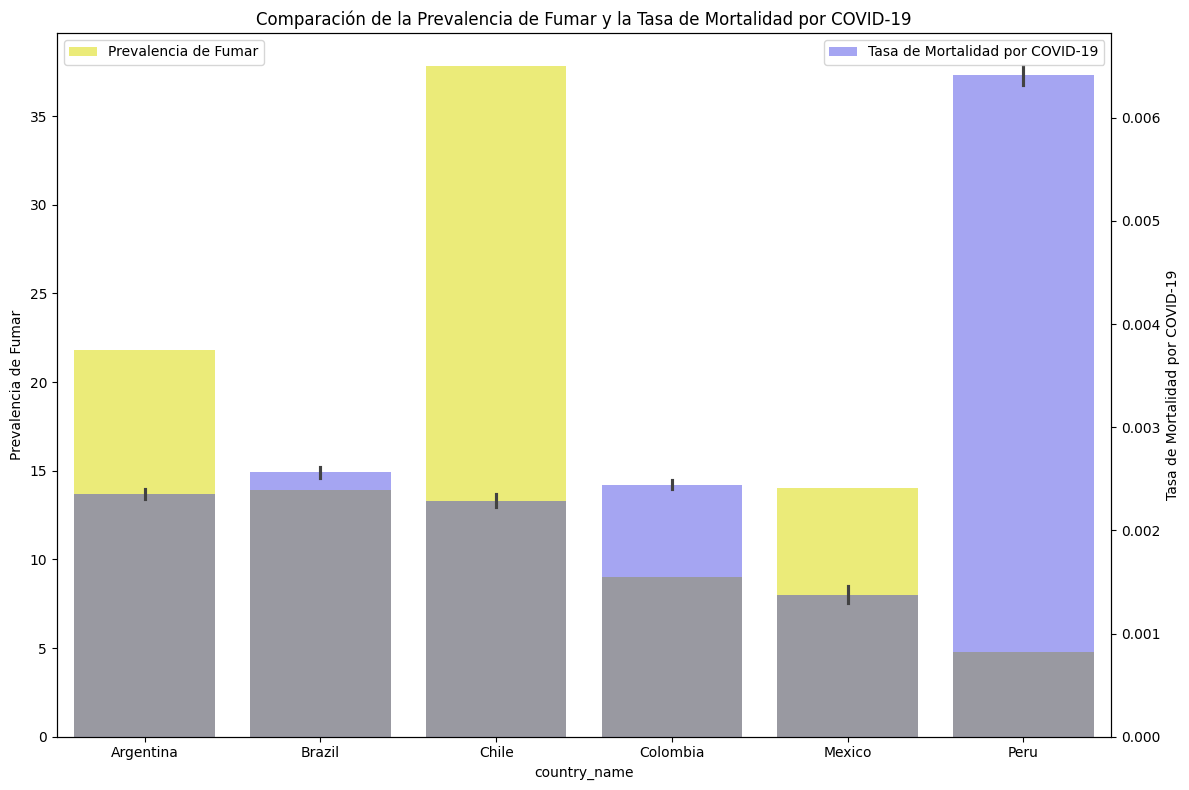

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

#El comando plt.xticks(rotation=90) en Matplotlib se usa para rotar las etiquetas del eje X en un gráfico. Aquí, el parámetro rotation=90 significa que las etiquetas de los valores en el eje X se rotarán 90 grados, lo que las hará aparecer verticalmente en lugar de horizontalmente.

#¿Por qué se usa esto?
#Rotar las etiquetas es útil cuando tienes etiquetas largas o muchas etiquetas en el eje X, lo que podría hacer que se superpongan y sean difíciles de leer si se muestran horizontalmente.

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

AVANCE 3

In [84]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2021-01-02 to 2022-09-17
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   country_code                           3744 non-null   object 
 2   country_name                           3744 non-null   object 
 3   new_confirmed                          3744 non-null   float64
 4   new_deceased                           3744 non-null   float64
 5   cumulative_confirmed                   3744 non-null   float64
 6   cumulative_deceased                    3744 non-null   float64
 7   cumulative_vaccine_doses_administered  3744 non-null   float64
 8   population                             3744 non-null   float64
 9   population_male                        3744 non-null   float64
 10  population_female                      3744 non-null  

In [85]:
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises

,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,week
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.00,166.00,1670634.00,46688.00,20334.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,53
2021-01-03,AR,AR,Argentina,4934.00,157.00,1675568.00,46845.00,20529.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,53
2021-01-04,AR,AR,Argentina,13953.00,157.00,1689521.00,47002.00,25164.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,1
2021-01-05,AR,AR,Argentina,14085.00,160.00,1703606.00,47162.00,29852.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,1
2021-01-06,AR,AR,Argentina,14496.00,131.00,1718102.00,47293.00,34162.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,PE,PE,Peru,1150.00,22.00,4127612.00,216173.00,0.00,29381884.00,14450757.00,...,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00,0.00,37
2022-09-14,PE,PE,Peru,12911.39,134.38,6079578.72,105716.12,0.00,29381884.00,14450757.00,...,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00,0.00,37
2022-09-15,PE,PE,Peru,12911.39,134.38,6079578.72,105716.12,0.00,29381884.00,14450757.00,...,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00,0.00,37


Como primera aproximación vamos a realizar un análisis del comportamiento de manera semanal y anual, para esto vamos a agrupar los datos por semana y por año. Para que recordemos como usar groupby.

In [89]:
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,week
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.00,166.00,1670634.00,46688.00,20334.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,53
2021-01-03,AR,AR,Argentina,4934.00,157.00,1675568.00,46845.00,20529.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,53
2021-01-04,AR,AR,Argentina,13953.00,157.00,1689521.00,47002.00,25164.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,1
2021-01-05,AR,AR,Argentina,14085.00,160.00,1703606.00,47162.00,29852.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,1
2021-01-06,AR,AR,Argentina,14496.00,131.00,1718102.00,47293.00,34162.00,44938712.00,19523766.00,...,2690269.00,55032.00,76.52,147.09,79.48,26.60,15.80,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,PE,PE,Peru,3261.00,29.00,2285854.00,202515.00,50186253.00,29381884.00,14450757.00,...,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00,0.00,52
2021-12-28,PE,PE,Peru,4270.00,37.00,2290124.00,202552.00,50515554.00,29381884.00,14450757.00,...,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00,0.00,52
2021-12-29,PE,PE,Peru,4340.00,40.00,2294464.00,202592.00,50800766.00,29381884.00,14450757.00,...,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00,0.00,52


In [88]:
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases #la tabla con el agrupamiento semanal de los casos confirmados y fallecidos por paíS

,country_name,week,new_confirmed,new_deceased
0,Argentina,1,85321.00,1093.00
1,Argentina,2,76129.00,1191.00
2,Argentina,3,66250.00,1321.00
3,Argentina,4,58524.00,1199.00
4,Argentina,5,50576.00,1112.00
...,...,...,...,...
313,Peru,49,10004.00,272.00
314,Peru,50,10637.00,265.00
315,Peru,51,11306.00,257.00
316,Peru,52,21381.00,188.00


In [64]:
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

In [65]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

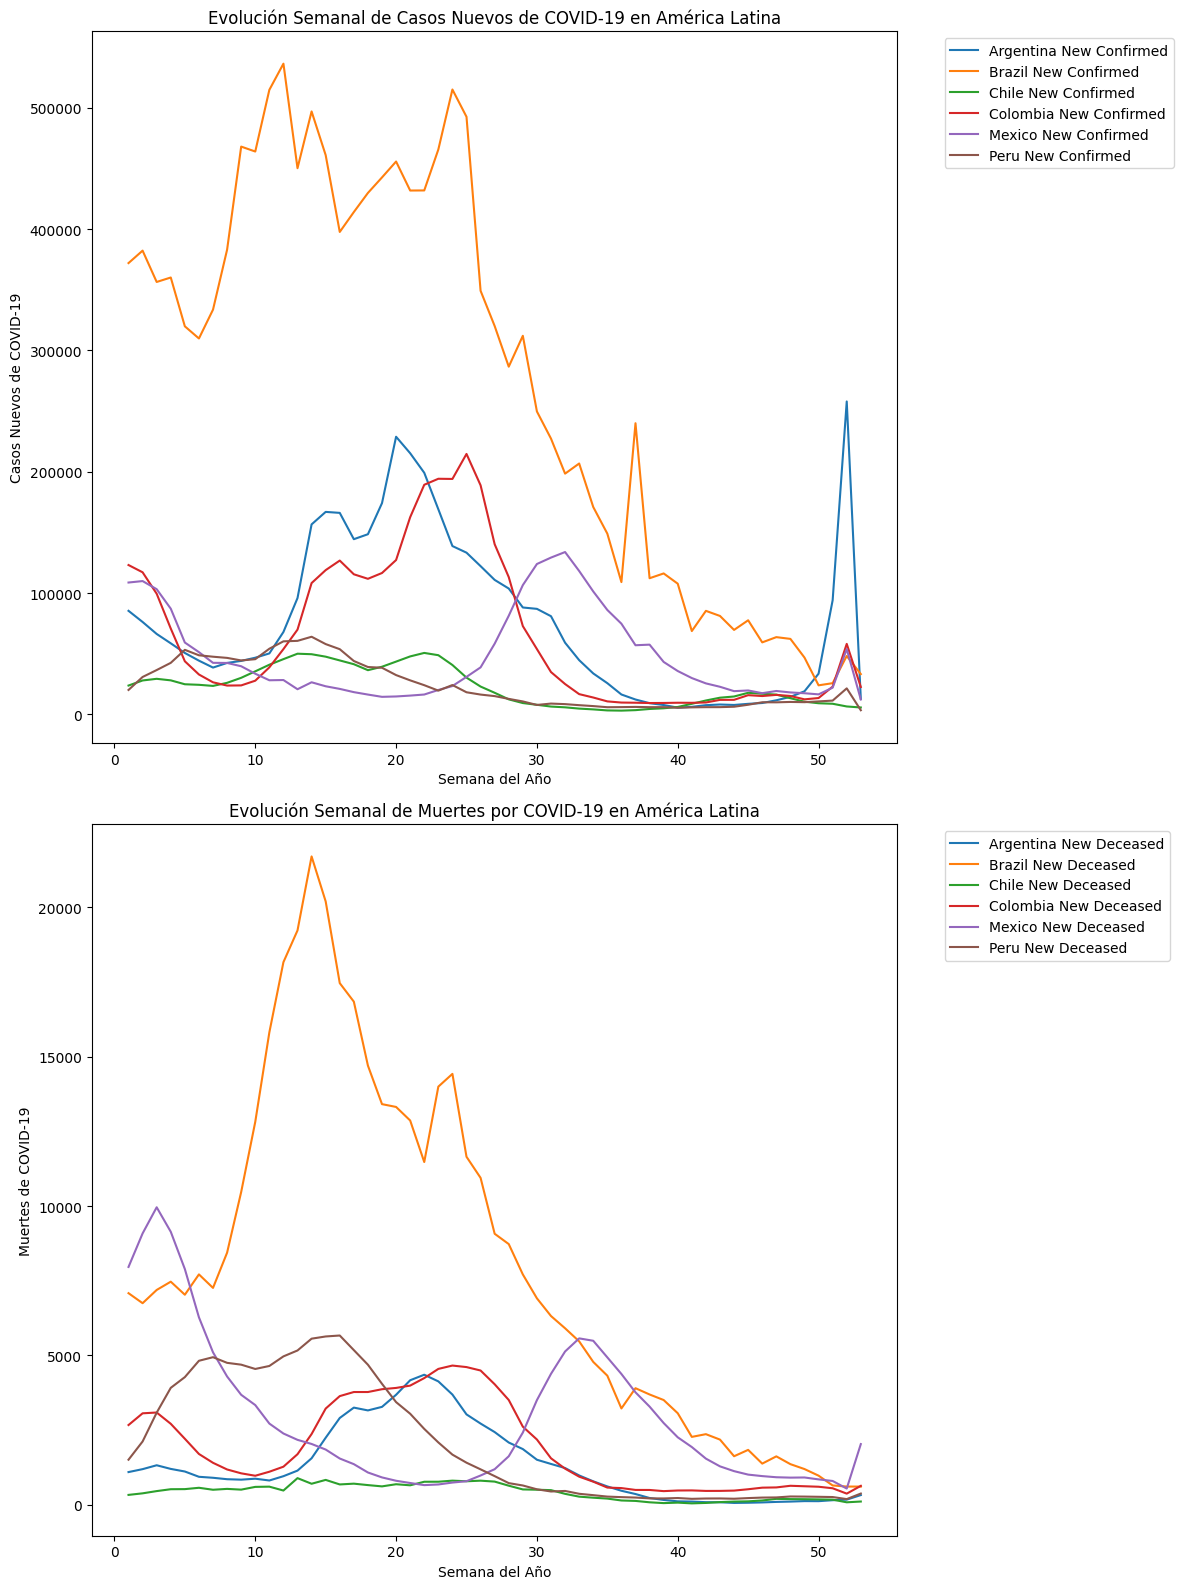

In [66]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Conclusiones:
Brasil experimentó tanto los picos más altos de casos nuevos como de muertes a lo largo del año en comparación con los otros países.
Perú destaca por tener también una alta tasa de mortalidad en relación con sus casos, aunque no muestra picos tan altos en el número de casos nuevos como Brasil.
Chile, Colombia y México muestran patrones de aumento y disminución similares, aunque no llegan a los niveles de Brasil y Perú.
Argentina tiene una tendencia más moderada en términos de casos y muertes en comparación con los otros países, aunque presenta algunos aumentos en momentos específicos.

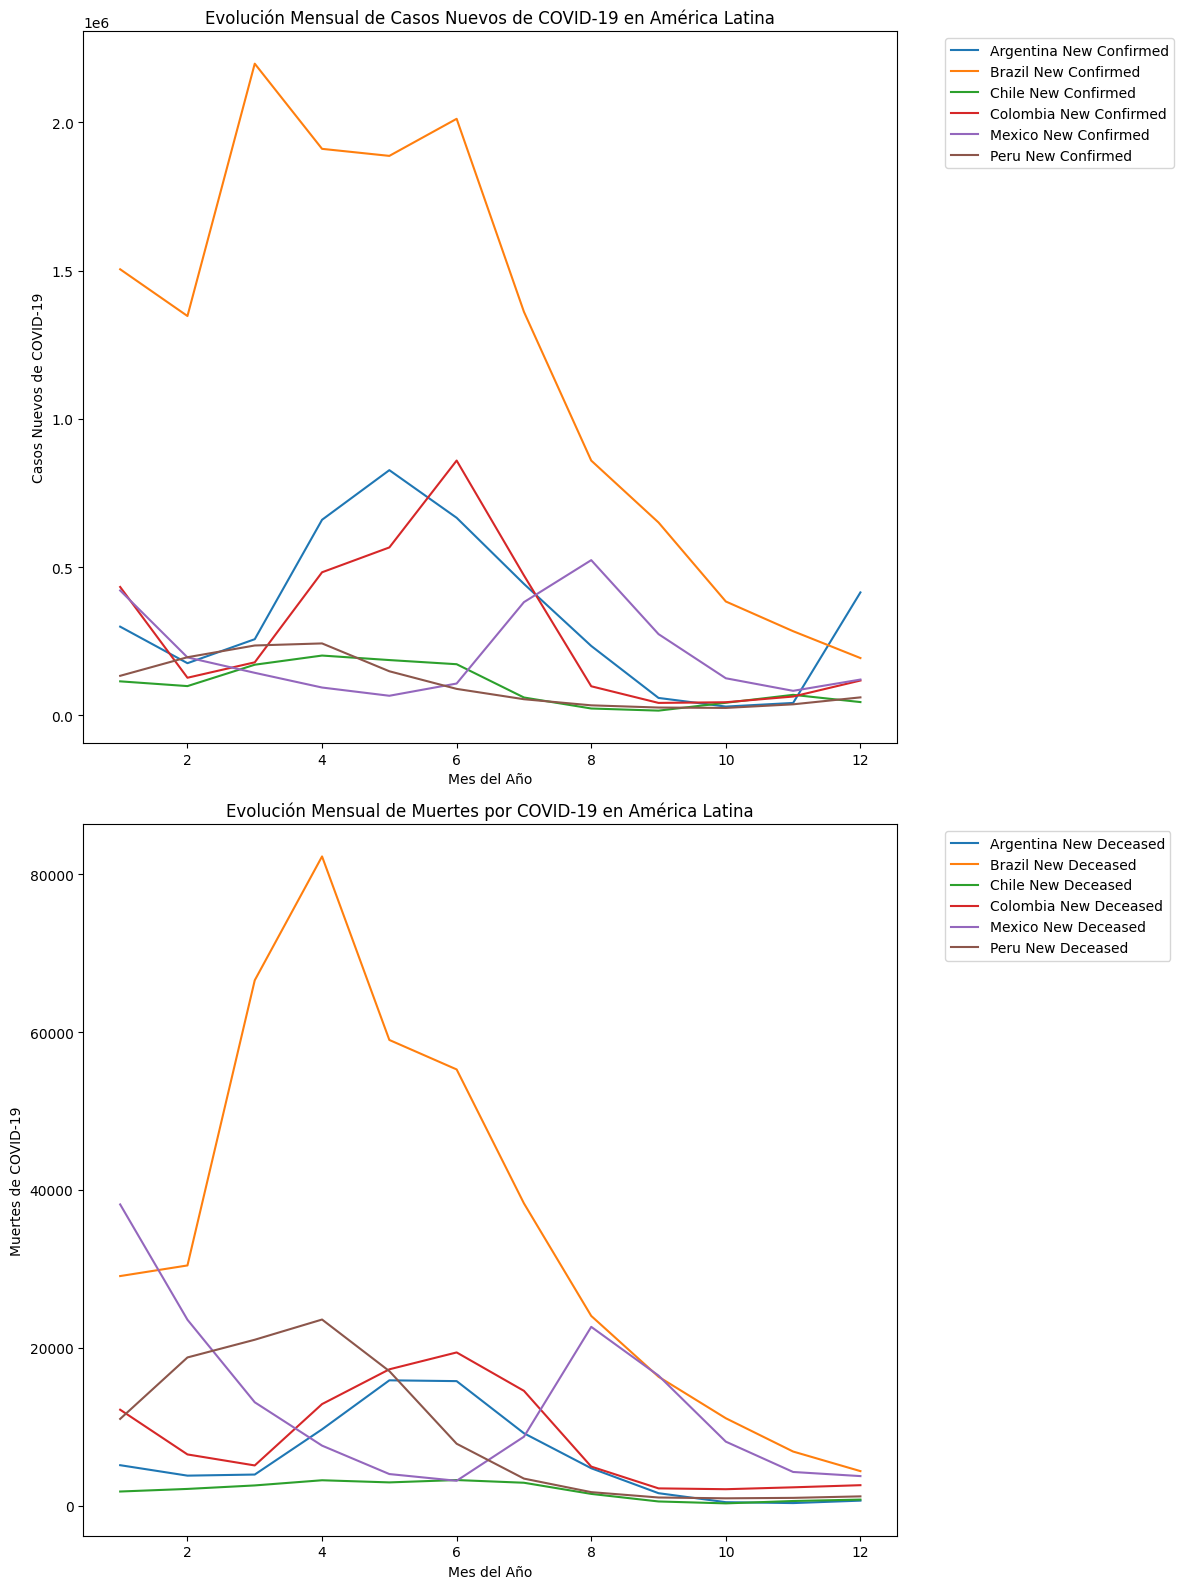

In [67]:
#ahora por vamos por mes del añoaño
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

De la anterior gráfica se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, ademas se nota un pico en la fechas finales.

4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:
    

Progreso de la Vacunacion por Pais: 

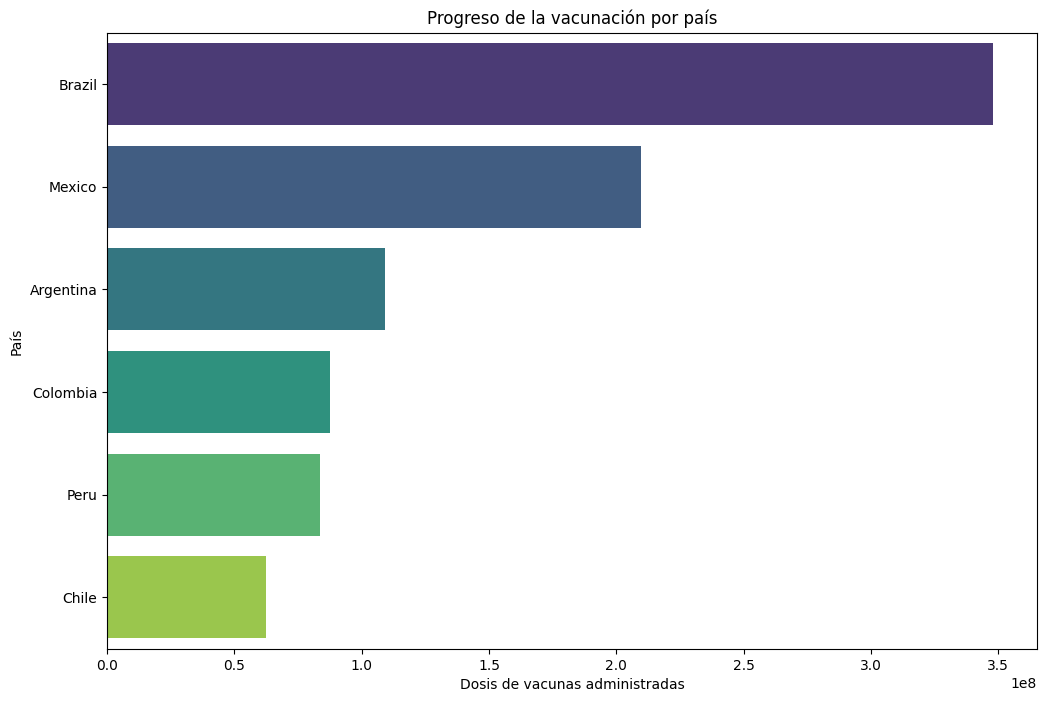

In [68]:
# - Comparación de Estrategias de Vacunación en América Latina
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

#.max(): Dentro de cada grupo (país), selecciona el valor máximo de la columna 'cumulative_vaccine_doses_administered'. 
# Esto te da el mayor número de dosis acumuladas administradas para cada país.

#.sort_values(ascending=False): Luego, los valores resultantes (máximo de dosis acumuladas por país) se ordenan en orden descendente.
# Esto significa que el país con el mayor número de dosis administradas aparecerá primero, y el país con el menor número de dosis aparecerá al final.

El país con mayor dosis administradas es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Se contradice con los hallazgos anteriores sin embargo recordemos que se debe tener en cuenta la población de cada país y la cantidad de vacunas disponibles.

- Comparación de estrategias de vacunación

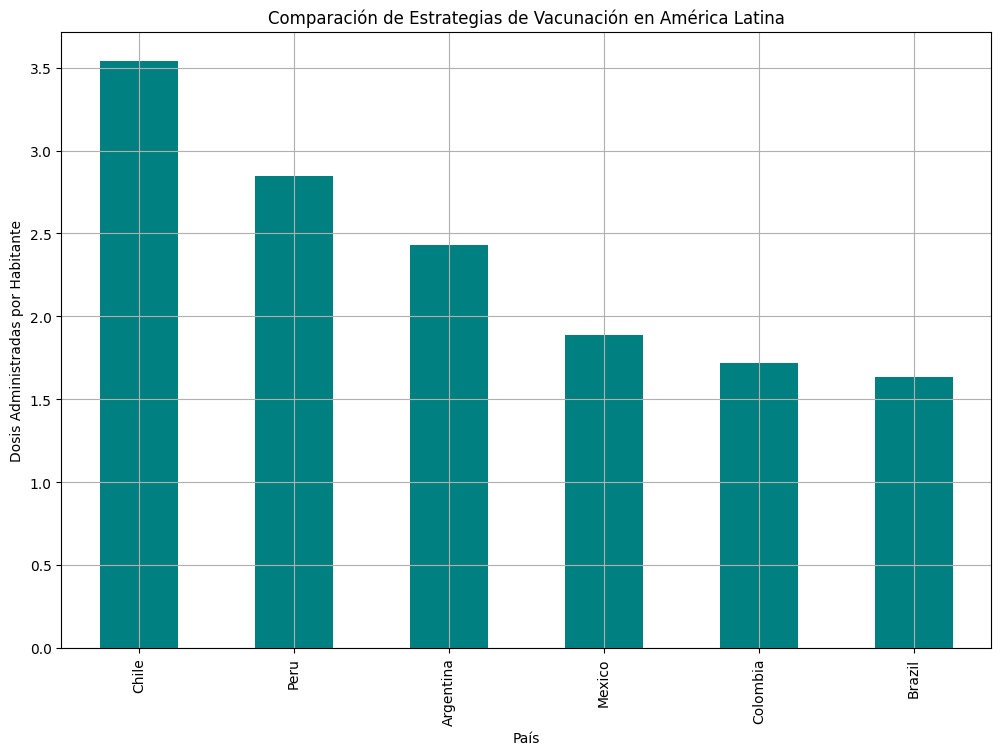

In [91]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.



EVOLUCION DE LAS VACUNAS Y REDUCCION DE CASOS DE AMERICA LATINA: 

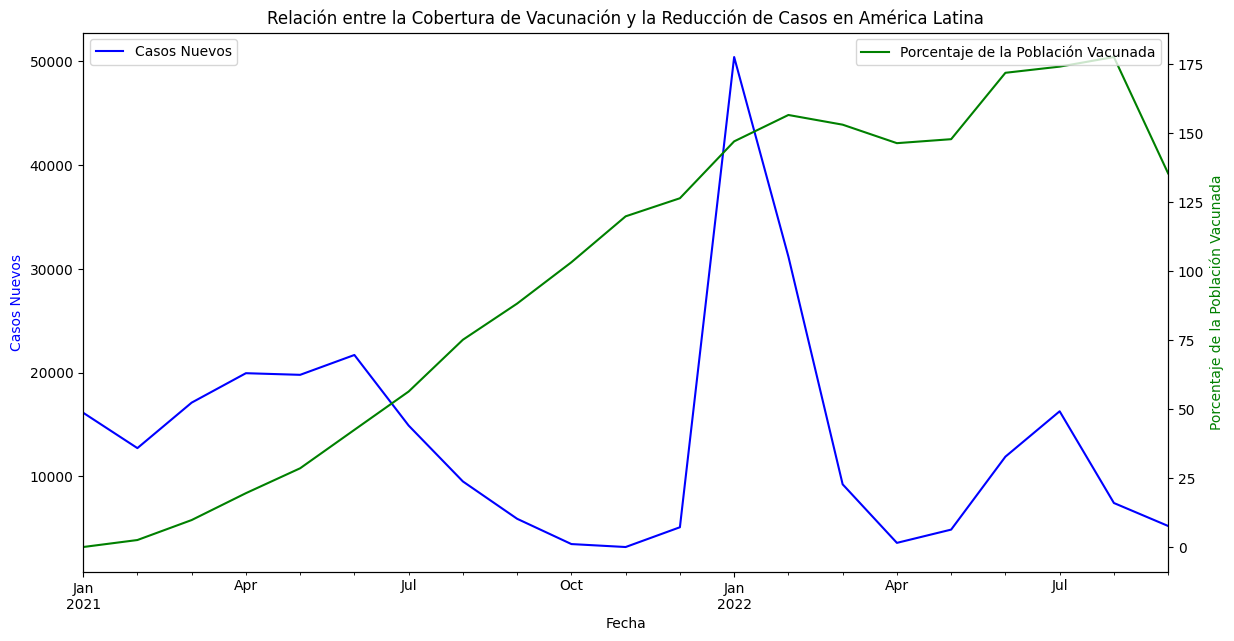

In [100]:

plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Los datos parecerían indicar que cuando se incrementó la población vacunada la cantidad de casos que venia creciendo comenzó a estabilizarse en valores de inicio de pandemia. 

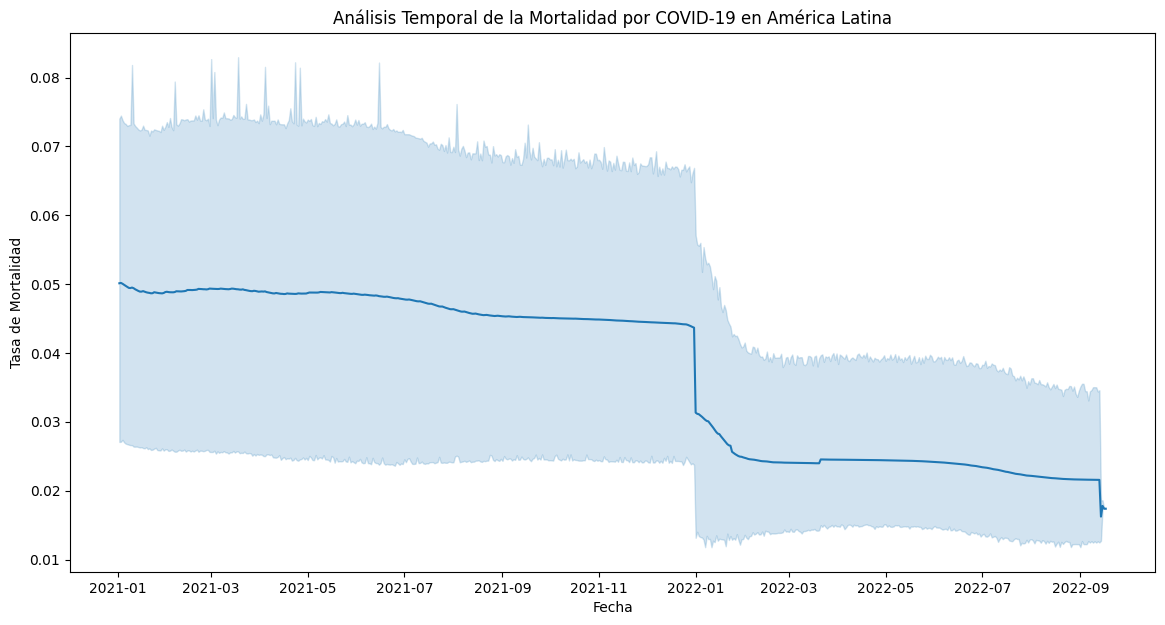

In [101]:
# cómo evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

La mortalidad por Covid 19 fue cayendo de manera pronunciada en la medidad en que avanzó la campaña de vacunación en America Latina. 

 Como evolucionan los casos activos y recuperados en América Latina:

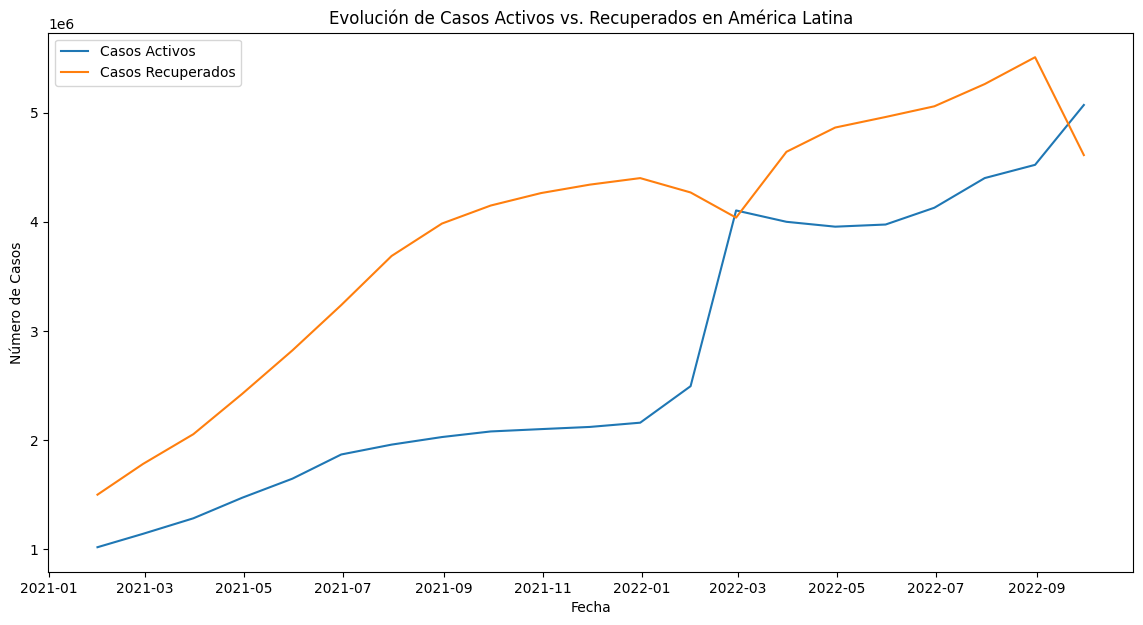

In [102]:

## Creo la columna active cases
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

La cantidad de casos activos fue creciendo mientras crecia a la par la cantidad de casos recuperados. 

SITUACION ACTUAL DE COVID-19 EN PAISES DE AMÉRICA LATINA:

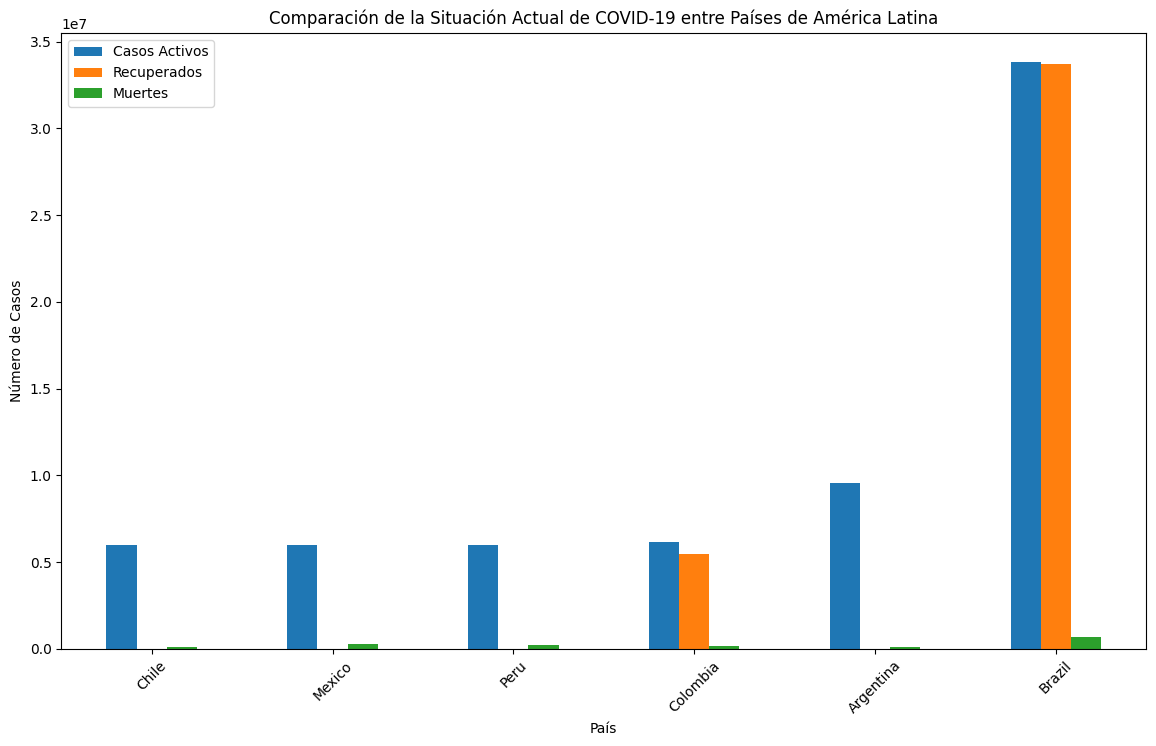

In [106]:

current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

#.sort_values(by="active_cases"):
#Luego de obtener el valor máximo para cada país, ordena los resultados por la columna 'active_cases' (número de casos activos).
#Los países serán ordenados de menor a mayor número de casos activos.
#current_situation:
#Finalmente, el resultado se guarda en la variable current_situation. Esta variable contendrá un DataFrame con los valores máximos de casos activos
# recuperados acumulados y fallecidos acumulados para cada país, ordenados por el número de casos activos.

 Por lo tanto los países donde debe expandirse la empresa farmaceutica son Brasil, México y Colombia ya que son los paises con mas casos confirmados, muertes y con menos vacunas administradas. Las políticas de vacunación no han sido las mejores o no han tenido la cantidad de vacunas necesarias. Hay tener en cuenta la densidad de la población y la cantidad de habitantes de cada país y los problemas socio-económicos que puedan afectar la cantidad de casos confirmados y muertes.